<a href="https://colab.research.google.com/github/haleykahn14/NFL-Salary-Cap/blob/main/CS3892.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression (Offensive and Defensive Spending on Wins)

In [ ]:
# step 1 deleted
# --- STEP 2: Import Libraries ---
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- STEP 3: Load Your Data ---
from google.colab import files
# uploaded = files.upload()
df = pd.read_excel('NFL Salary By Position Group.xlsx', engine='openpyxl')
df.head()
# Quick check
print(df.head())


      Team_Season       Team        QB       RB        WR        TE  \
0  Cardinals 2022  Cardinals  16348925  6213758  24621833   7121287   
1    Falcons 2022    Falcons   6303695  4894510   9535858  10678128   
2     Ravens 2022     Ravens  24100655  8179654   7616822  12307075   
3      Bills 2022      Bills  20230481  7299886  18982654   4501683   
4   Panthers 2022   Panthers  20461726  3829960  12882679   5253310   

   Pass-Catchers        OL  Skill_Pos_Offense   Offense  ...  Front-7_P  \
0       31743120  44681251           54305803  98987054  ...   0.233981   
1       20213986  32848444           31412191  64260635  ...   0.139764   
2       19923897  38678276           52204206  90882482  ...   0.162943   
3       23484337  29350967           51014704  80365671  ...   0.252778   
4       18135989  33291588           42427675  75719263  ...   0.212204   

        S_P      CB_P  Secondary_P  Defense_P  Offense_P  Dead_Open_Specials  \
0  0.094174  0.034218     0.128391   0.362


Model Performance:
Mean Squared Error: 0.0400
R² Score: 0.1252

Model Coefficients:
Intercept: -0.0748
Offense_P Coefficient: 0.6084
Defense_P Coefficient: 0.7661


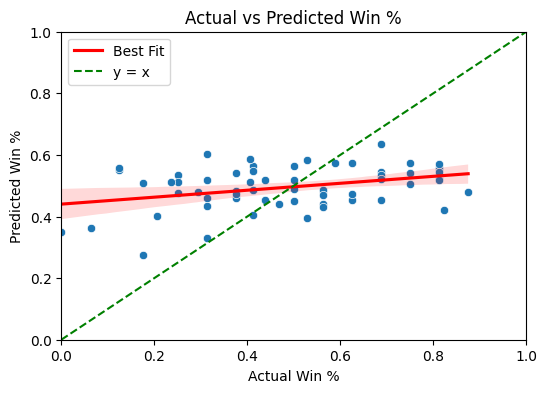


Predicted Win % for Offense=48%, Defense=52%: 0.616


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:

# --- STEP 4: Select Features & Target ---
X = df[['Offense_P', 'Defense_P']]  # Features
y = df['W_PCT']  # Target

# --- STEP 5: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 6: Train Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- STEP 7: Predictions ---
y_pred = model.predict(X_test)

# --- STEP 8: Evaluate Model ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- STEP 9: Coefficients ---
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Offense_P Coefficient: {model.coef_[0]:.4f}")
print(f"Defense_P Coefficient: {model.coef_[1]:.4f}")

# Interpretation:
# Positive coefficient -> spending more on that side tends to increase W_PCT
# Negative coefficient -> spending more on that side tends to decrease W_PCT

# --- STEP 10: Visualization ---
plt.figure(figsize=(6, 4))

# Scatter plot
sns.scatterplot(x=y_test, y=y_pred)

# Line of best fit
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Best Fit')

# y = x line
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='y = x')

# Axis labels and title
plt.xlabel('Actual Win %')
plt.ylabel('Predicted Win %')
plt.title('Actual vs Predicted Win %')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

plt.show()

# IMPORTANT
# The code below cannot be accurately/appropriately run in this example,
# but serves as context for how the prediction can work in future models
# --- STEP 11: Example Prediction ---
example = np.array([[0.48, 0.52]])  # 48% Offense, 52% Defense
predicted_win_pct = model.predict(example)[0]
print(f"\nPredicted Win % for Offense=48%, Defense=52%: {predicted_win_pct:.3f}")

# Linear Regression (PA & PF vs Offensive & Defensive Spending)



Model Performance: PF vs Offense_P
MSE: 5705.16
R²: 0.0783
Intercept: 281.54, Offense_P Coef: 202.22


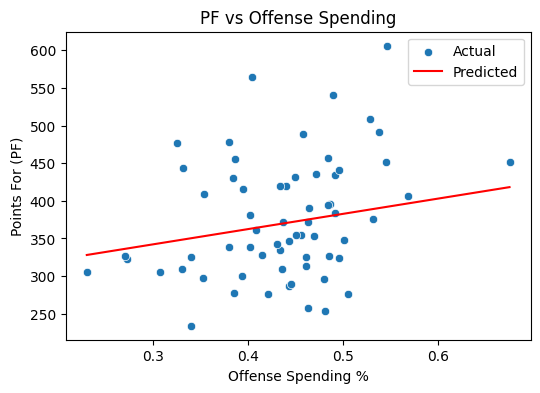


Model Performance: PA vs Defense_P
MSE: 3657.58
R²: 0.0085
Intercept: 463.20, Defense_P Coef: -229.07


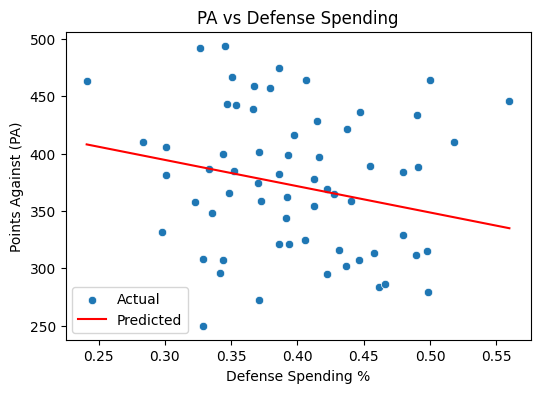

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
df = pd.read_excel('NFL Salary By Position Group.xlsx', engine='openpyxl')

# --- 1. Points For vs Offense Spending ---
X_off = df[['Offense_P']]
y_pf = df['PF']

X_train, X_test, y_train, y_test = train_test_split(X_off, y_pf, test_size=0.2, random_state=42)
model_pf = LinearRegression()
model_pf.fit(X_train, y_train)
y_pred = model_pf.predict(X_test)

print("\nModel Performance: PF vs Offense_P")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"Intercept: {model_pf.intercept_:.2f}, Offense_P Coef: {model_pf.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Offense_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Offense_P'], y=y_pred, color="red", label="Predicted")
plt.xlabel("Offense Spending %")
plt.ylabel("Points For (PF)")
plt.title("PF vs Offense Spending")
plt.legend()
plt.show()

# --- 2. Points Against vs Defense Spending ---
X_def = df[['Defense_P']]
y_pa = df['PA']

X_train, X_test, y_train, y_test = train_test_split(X_def, y_pa, test_size=0.2, random_state=42)
model_pa = LinearRegression()
model_pa.fit(X_train, y_train)
y_pred = model_pa.predict(X_test)

print("\nModel Performance: PA vs Defense_P")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"Intercept: {model_pa.intercept_:.2f}, Defense_P Coef: {model_pa.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Defense_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Defense_P'], y=y_pred, color="red", label="Predicted")
plt.xlabel("Defense Spending %")
plt.ylabel("Points Against (PA)")
plt.title("PA vs Defense Spending")
plt.legend()
plt.show()



# Linear Regression (PA & PF Rank vs Offensive & Defensive Spending)


Model Performance: PF Rank vs Offense_P
MSE: 91.00
R²: 0.0897
Intercept: 28.82, Offense_P Coef: -28.45


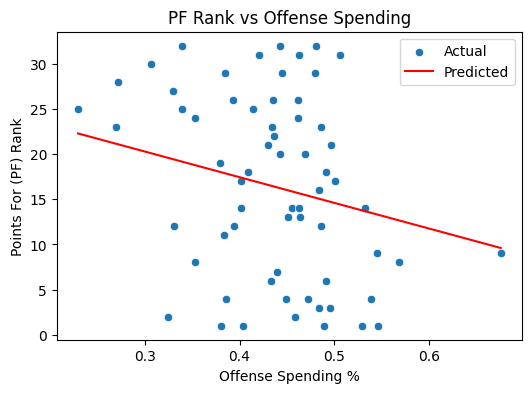


Model Performance: PA Rank vs Defense_P
MSE: 90.58
R²: 0.0320
Intercept: 32.05, Defense_P Coef: -38.68


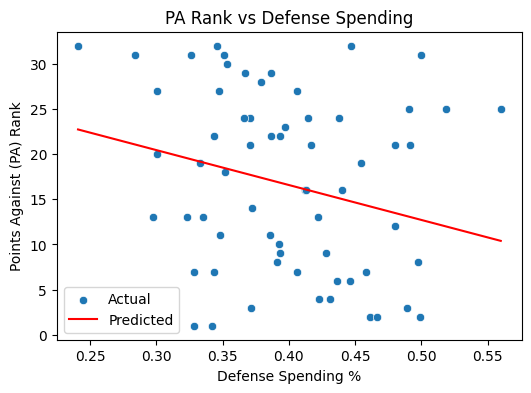

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
df = pd.read_excel('NFL Salary By Position Group.xlsx', engine='openpyxl')

# --- 1. Points For vs Offense Spending ---
X_off = df[['Offense_P']]
y_pf = df['PF_Rank']

X_train, X_test, y_train, y_test = train_test_split(X_off, y_pf, test_size=0.2, random_state=42)
model_pf = LinearRegression()
model_pf.fit(X_train, y_train)
y_pred = model_pf.predict(X_test)

print("\nModel Performance: PF Rank vs Offense_P")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"Intercept: {model_pf.intercept_:.2f}, Offense_P Coef: {model_pf.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Offense_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Offense_P'], y=y_pred, color="red", label="Predicted")
plt.xlabel("Offense Spending %")
plt.ylabel("Points For (PF) Rank")
plt.title("PF Rank vs Offense Spending")
plt.legend()
plt.show()

# --- 2. Points Against vs Defense Spending ---
X_def = df[['Defense_P']]
y_pa = df['PA_Rank']

X_train, X_test, y_train, y_test = train_test_split(X_def, y_pa, test_size=0.2, random_state=42)
model_pa = LinearRegression()
model_pa.fit(X_train, y_train)
y_pred = model_pa.predict(X_test)

print("\nModel Performance: PA Rank vs Defense_P")
print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")
print(f"Intercept: {model_pa.intercept_:.2f}, Defense_P Coef: {model_pa.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Defense_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Defense_P'], y=y_pred, color="red", label="Predicted")
plt.xlabel("Defense Spending %")
plt.ylabel("Points Against (PA) Rank")
plt.title("PA Rank vs Defense Spending")
plt.legend()
plt.show()


# Linear Regression (Positional Groups Predicting Wins)


Model Performance: Wins vs Pass-Catchers
MSE: 0.04
R²: 0.0244
Intercept: 0.44, Pass-Catchers Coef: 0.42


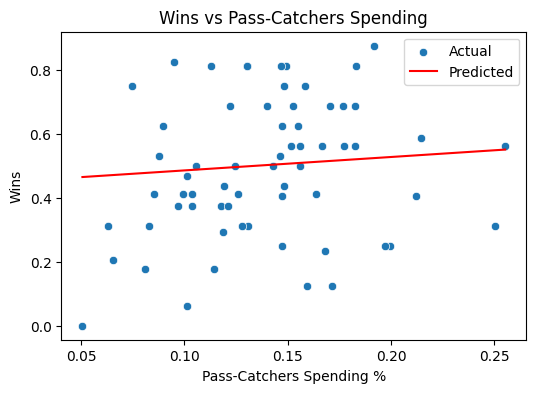


Model Performance: Wins vs Skill Positions
MSE: 0.04
R²: 0.0857
Intercept: 0.37, Skill_Positions Coef: 0.48


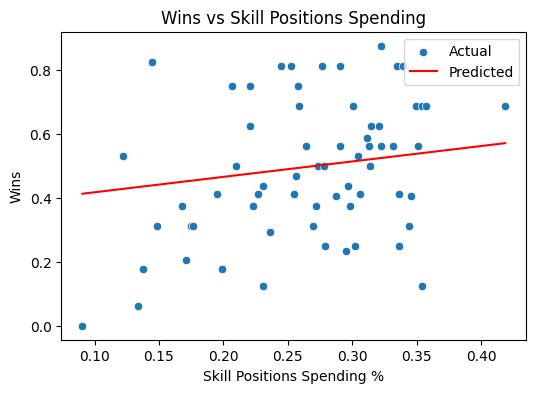


Model Performance: Wins vs D-Line
MSE: 0.04
R²: 0.0267
Intercept: 0.42, D-Line Coef: 0.44


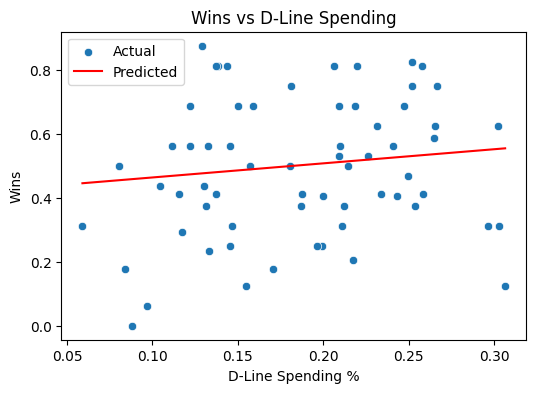


Model Performance: Wins vs Front-7
MSE: 0.04
R²: 0.0236
Intercept: 0.36, Front-7 Coef: 0.54


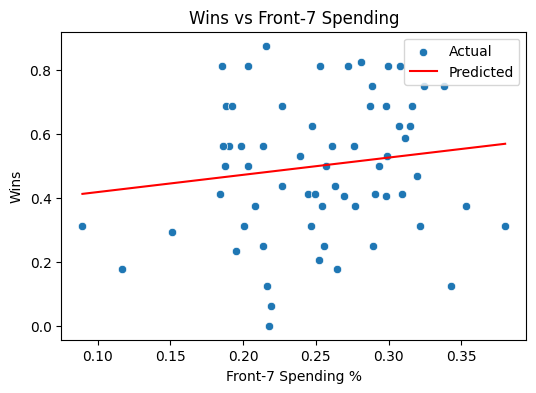


Model Performance: Wins vs Secondary
MSE: 0.05
R²: -0.0115
Intercept: 0.43, Secondary Coef: 0.48


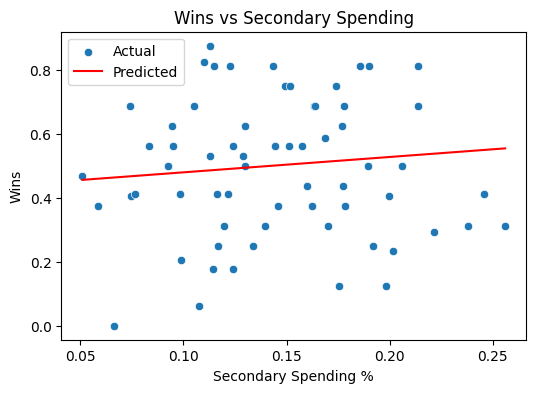


Model Performance: Wins vs QB
MSE: 0.04
R²: 0.0321
Intercept: 0.48, Secondary Coef: 0.23


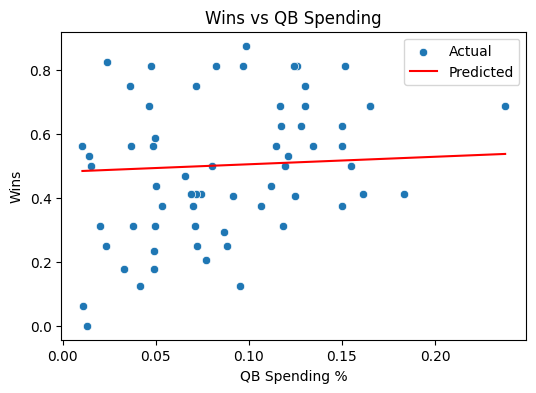

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
df = pd.read_excel('NFL Salary By Position Group.xlsx', engine='openpyxl')

# --- 1. Wins vs Pass-Catchers Spending ---
X_pass_catchers = df[['Pass-Catcher_P']]
y_wins = df['W_PCT']  # Assuming 'Wins' is the column for total wins

X_train, X_test, y_train, y_test = train_test_split(X_pass_catchers, y_wins, test_size=0.2, random_state=42)
model_wc = LinearRegression()
model_wc.fit(X_train, y_train)
y_pred_wc = model_wc.predict(X_test)

print("\nModel Performance: Wins vs Pass-Catchers")
print(f"MSE: {mean_squared_error(y_test, y_pred_wc):.2f}")
print(f"R²: {r2_score(y_test, y_pred_wc):.4f}")
print(f"Intercept: {model_wc.intercept_:.2f}, Pass-Catchers Coef: {model_wc.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Pass-Catcher_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Pass-Catcher_P'], y=y_pred_wc, color="red", label="Predicted")
plt.xlabel("Pass-Catchers Spending %")
plt.ylabel("Wins")
plt.title("Wins vs Pass-Catchers Spending")
plt.legend()
plt.show()

# --- 2. Wins vs Skill Positions Spending ---
X_skill_positions = df[['Skill_Pos_Offense_P']]
X_train, X_test, y_train, y_test = train_test_split(X_skill_positions, y_wins, test_size=0.2, random_state=42)
model_wsp = LinearRegression()
model_wsp.fit(X_train, y_train)
y_pred_wsp = model_wsp.predict(X_test)

print("\nModel Performance: Wins vs Skill Positions")
print(f"MSE: {mean_squared_error(y_test, y_pred_wsp):.2f}")
print(f"R²: {r2_score(y_test, y_pred_wsp):.4f}")
print(f"Intercept: {model_wsp.intercept_:.2f}, Skill_Positions Coef: {model_wsp.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Skill_Pos_Offense_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Skill_Pos_Offense_P'], y=y_pred_wsp, color="red", label="Predicted")
plt.xlabel("Skill Positions Spending %")
plt.ylabel("Wins")
plt.title("Wins vs Skill Positions Spending")
plt.legend()
plt.show()

# --- 3. Wins vs D-Line Spending ---
X_dline = df[['D-Line_P']]
X_train, X_test, y_train, y_test = train_test_split(X_dline, y_wins, test_size=0.2, random_state=42)
model_wd = LinearRegression()
model_wd.fit(X_train, y_train)
y_pred_wd = model_wd.predict(X_test)

print("\nModel Performance: Wins vs D-Line")
print(f"MSE: {mean_squared_error(y_test, y_pred_wd):.2f}")
print(f"R²: {r2_score(y_test, y_pred_wd):.4f}")
print(f"Intercept: {model_wd.intercept_:.2f}, D-Line Coef: {model_wd.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['D-Line_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['D-Line_P'], y=y_pred_wd, color="red", label="Predicted")
plt.xlabel("D-Line Spending %")
plt.ylabel("Wins")
plt.title("Wins vs D-Line Spending")
plt.legend()
plt.show()

# --- 4. Wins vs Front-7 Spending ---
X_front7 = df[['Front-7_P']]
X_train, X_test, y_train, y_test = train_test_split(X_front7, y_wins, test_size=0.2, random_state=42)
model_wf = LinearRegression()
model_wf.fit(X_train, y_train)
y_pred_wf = model_wf.predict(X_test)

print("\nModel Performance: Wins vs Front-7")
print(f"MSE: {mean_squared_error(y_test, y_pred_wf):.2f}")
print(f"R²: {r2_score(y_test, y_pred_wf):.4f}")
print(f"Intercept: {model_wf.intercept_:.2f}, Front-7 Coef: {model_wf.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Front-7_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Front-7_P'], y=y_pred_wf, color="red", label="Predicted")
plt.xlabel("Front-7 Spending %")
plt.ylabel("Wins")
plt.title("Wins vs Front-7 Spending")
plt.legend()
plt.show()

# --- 5. Wins vs Secondary Spending ---
X_secondary = df[['Secondary_P']]
X_train, X_test, y_train, y_test = train_test_split(X_secondary, y_wins, test_size=0.2, random_state=42)
model_ws = LinearRegression()
model_ws.fit(X_train, y_train)
y_pred_ws = model_ws.predict(X_test)

print("\nModel Performance: Wins vs Secondary")
print(f"MSE: {mean_squared_error(y_test, y_pred_ws):.2f}")
print(f"R²: {r2_score(y_test, y_pred_ws):.4f}")
print(f"Intercept: {model_ws.intercept_:.2f}, Secondary Coef: {model_ws.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Secondary_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Secondary_P'], y=y_pred_ws, color="red", label="Predicted")
plt.xlabel("Secondary Spending %")
plt.ylabel("Wins")
plt.title("Wins vs Secondary Spending")
plt.legend()
plt.show()

# --- 6. Wins vs QB Spending ---
X_secondary = df[['QB_P']]
X_train, X_test, y_train, y_test = train_test_split(X_secondary, y_wins, test_size=0.2, random_state=42)
model_ws = LinearRegression()
model_ws.fit(X_train, y_train)
y_pred_ws = model_ws.predict(X_test)

print("\nModel Performance: Wins vs QB")
print(f"MSE: {mean_squared_error(y_test, y_pred_ws):.2f}")
print(f"R²: {r2_score(y_test, y_pred_ws):.4f}")
print(f"Intercept: {model_ws.intercept_:.2f}, Secondary Coef: {model_ws.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['QB_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['QB_P'], y=y_pred_ws, color="red", label="Predicted")
plt.xlabel("QB Spending %")
plt.ylabel("Wins")
plt.title("Wins vs QB Spending")
plt.legend()
plt.show()

# Linear Regression (Positional Groups Predicting PA & PF)

Correlation between Pass-Catchers Spending and Points For: 0.1330

Model Performance: Points For vs Pass-Catchers
MSE: 6034.77
R²: 0.0250
Intercept: 346.57, Pass-Catchers Coef: 162.03


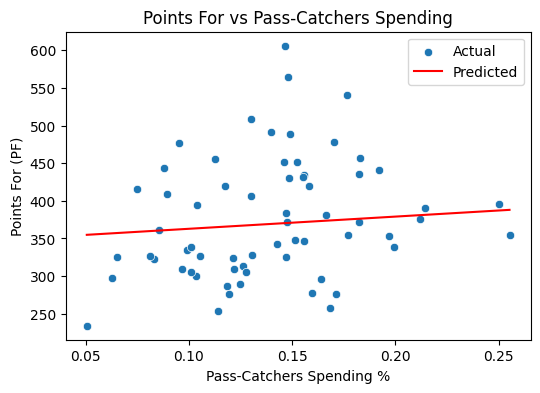

Correlation between Skill Positions Spending and Points For: 0.2253

Model Performance: Points For vs Skill Positions
MSE: 5862.89
R²: 0.0528
Intercept: 301.44, Skill_Positions Coef: 244.69


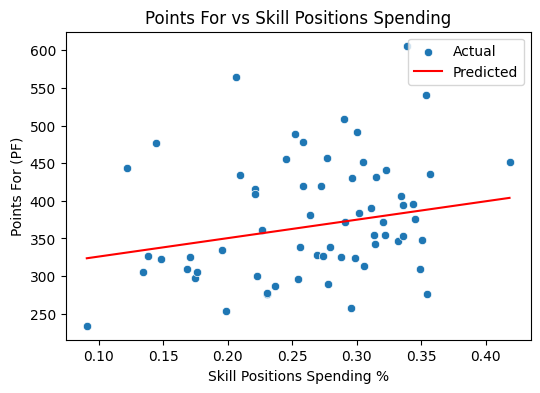

Correlation between QB Spending and Points For: 0.1556

Model Performance: Points For vs QB
MSE: 5977.28
R²: 0.0343
Intercept: 352.88, QB Coef: 178.11


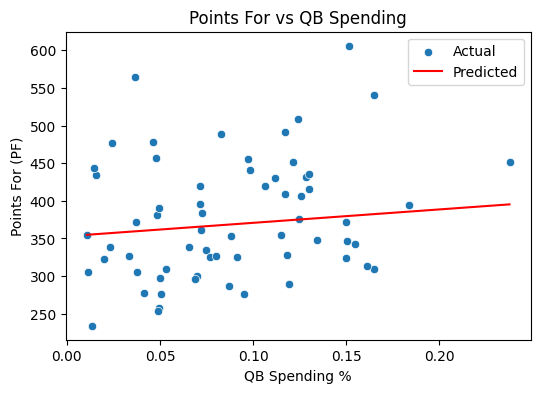

Correlation between D-Line Spending and Points Against: -0.1617

Model Performance: Points Against vs D-Line
MSE: 3648.78
R²: 0.0109
Intercept: 400.12, D-Line Coef: -160.04


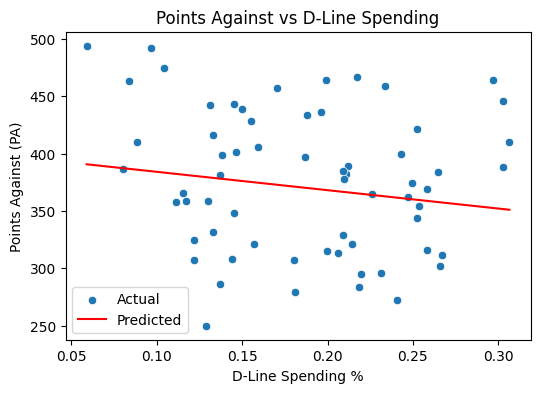

Correlation between Front-7 Spending and Points Against: -0.1687

Model Performance: Points Against vs Front-7
MSE: 3583.49
R²: 0.0286
Intercept: 406.29, Front-7 Coef: -141.60


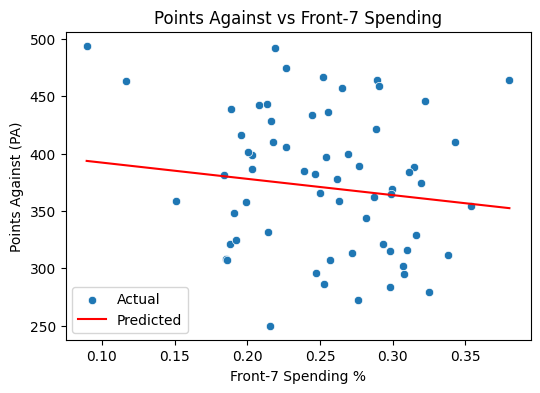

Correlation between Secondary Spending and Points Against: -0.1980

Model Performance: Points Against vs Secondary
MSE: 3972.04
R²: -0.0767
Intercept: 412.48, Secondary Coef: -286.11


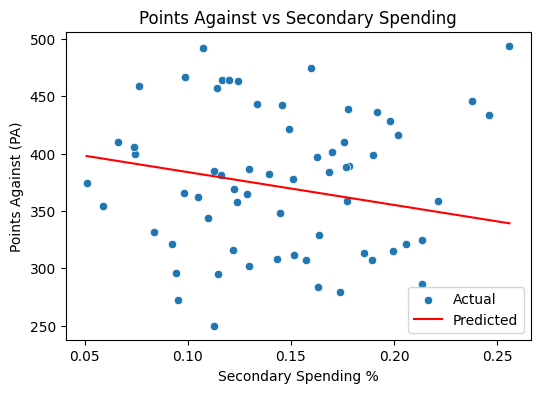

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
df = pd.read_excel('NFL Salary By Position Group.xlsx', engine='openpyxl')

# --- 1. Points For vs Pass-Catchers Spending ---
X_pass_catchers = df[['Pass-Catcher_P']]
y_pf = df['PF']  # Assuming 'PF' is the column for Points For

# Calculate and print correlation coefficient
correlation_pf_pass_catchers = df['Pass-Catcher_P'].corr(df['PF'])
print(f"Correlation between Pass-Catchers Spending and Points For: {correlation_pf_pass_catchers:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_pass_catchers, y_pf, test_size=0.2, random_state=42)
model_pf_wc = LinearRegression()
model_pf_wc.fit(X_train, y_train)
y_pred_pf_wc = model_pf_wc.predict(X_test)

print("\nModel Performance: Points For vs Pass-Catchers")
print(f"MSE: {mean_squared_error(y_test, y_pred_pf_wc):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pf_wc):.4f}")
print(f"Intercept: {model_pf_wc.intercept_:.2f}, Pass-Catchers Coef: {model_pf_wc.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Pass-Catcher_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Pass-Catcher_P'], y=y_pred_pf_wc, color="red", label="Predicted")
plt.xlabel("Pass-Catchers Spending %")
plt.ylabel("Points For (PF)")
plt.title("Points For vs Pass-Catchers Spending")
plt.legend()
plt.show()

# --- 2. Points For vs Skill Positions Spending ---
X_skill_positions = df[['Skill_Pos_Offense_P']]
# Calculate and print correlation coefficient
correlation_pf_skill_positions = df['Skill_Pos_Offense_P'].corr(df['PF'])
print(f"Correlation between Skill Positions Spending and Points For: {correlation_pf_skill_positions:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_skill_positions, y_pf, test_size=0.2, random_state=42)
model_pf_wsp = LinearRegression()
model_pf_wsp.fit(X_train, y_train)
y_pred_pf_wsp = model_pf_wsp.predict(X_test)

print("\nModel Performance: Points For vs Skill Positions")
print(f"MSE: {mean_squared_error(y_test, y_pred_pf_wsp):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pf_wsp):.4f}")
print(f"Intercept: {model_pf_wsp.intercept_:.2f}, Skill_Positions Coef: {model_pf_wsp.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Skill_Pos_Offense_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Skill_Pos_Offense_P'], y=y_pred_pf_wsp, color="red", label="Predicted")
plt.xlabel("Skill Positions Spending %")
plt.ylabel("Points For (PF)")
plt.title("Points For vs Skill Positions Spending")
plt.legend()
plt.show()

# --- 6. Points For vs QB Spending ---
X_qb = df[['QB_P']]
# Calculate and print correlation coefficient
correlation_pf_qb = df['QB_P'].corr(df['PF'])
print(f"Correlation between QB Spending and Points For: {correlation_pf_qb:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_qb, y_pf, test_size=0.2, random_state=42)
model_pf_qb = LinearRegression()
model_pf_qb.fit(X_train, y_train)
y_pred_pf_qb = model_pf_qb.predict(X_test)

print("\nModel Performance: Points For vs QB")
print(f"MSE: {mean_squared_error(y_test, y_pred_pf_qb):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pf_qb):.4f}")
print(f"Intercept: {model_pf_qb.intercept_:.2f}, QB Coef: {model_pf_qb.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['QB_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['QB_P'], y=y_pred_pf_qb, color="red", label="Predicted")
plt.xlabel("QB Spending %")
plt.ylabel("Points For (PF)")
plt.title("Points For vs QB Spending")
plt.legend()
plt.show()

# ----- POINTS AGAINST -------

# --- 9. Points Against vs D-Line Spending ---
X_dline = df[['D-Line_P']]
y_pa = df['PA']  # Assuming 'PA' is the column for Points Against

# Calculate and print correlation coefficient
correlation_pa_dline = df['D-Line_P'].corr(df['PA'])
print(f"Correlation between D-Line Spending and Points Against: {correlation_pa_dline:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_dline, y_pa, test_size=0.2, random_state=42)
model_pa_wd = LinearRegression()
model_pa_wd.fit(X_train, y_train)
y_pred_pa_wd = model_pa_wd.predict(X_test)

print("\nModel Performance: Points Against vs D-Line")
print(f"MSE: {mean_squared_error(y_test, y_pred_pa_wd):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pa_wd):.4f}")
print(f"Intercept: {model_pa_wd.intercept_:.2f}, D-Line Coef: {model_pa_wd.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['D-Line_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['D-Line_P'], y=y_pred_pa_wd, color="red", label="Predicted")
plt.xlabel("D-Line Spending %")
plt.ylabel("Points Against (PA)")
plt.title("Points Against vs D-Line Spending")
plt.legend()
plt.show()

# --- 10. Points Against vs Front-7 Spending ---
X_front7 = df[['Front-7_P']]
# Calculate and print correlation coefficient
correlation_pa_front7 = df['Front-7_P'].corr(df['PA'])
print(f"Correlation between Front-7 Spending and Points Against: {correlation_pa_front7:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_front7, y_pa, test_size=0.2, random_state=42)
model_pa_wf = LinearRegression()
model_pa_wf.fit(X_train, y_train)
y_pred_pa_wf = model_pa_wf.predict(X_test)

print("\nModel Performance: Points Against vs Front-7")
print(f"MSE: {mean_squared_error(y_test, y_pred_pa_wf):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pa_wf):.4f}")
print(f"Intercept: {model_pa_wf.intercept_:.2f}, Front-7 Coef: {model_pa_wf.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Front-7_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Front-7_P'], y=y_pred_pa_wf, color="red", label="Predicted")
plt.xlabel("Front-7 Spending %")
plt.ylabel("Points Against (PA)")
plt.title("Points Against vs Front-7 Spending")
plt.legend()
plt.show()

# --- 11. Points Against vs Secondary Spending ---
X_secondary = df[['Secondary_P']]
# Calculate and print correlation coefficient
correlation_pa_secondary = df['Secondary_P'].corr(df['PA'])
print(f"Correlation between Secondary Spending and Points Against: {correlation_pa_secondary:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_secondary, y_pa, test_size=0.2, random_state=42)
model_pa_ws = LinearRegression()
model_pa_ws.fit(X_train, y_train)
y_pred_pa_ws = model_pa_ws.predict(X_test)

print("\nModel Performance: Points Against vs Secondary")
print(f"MSE: {mean_squared_error(y_test, y_pred_pa_ws):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pa_ws):.4f}")
print(f"Intercept: {model_pa_ws.intercept_:.2f}, Secondary Coef: {model_pa_ws.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Secondary_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Secondary_P'], y=y_pred_pa_ws, color="red", label="Predicted")
plt.xlabel("Secondary Spending %")
plt.ylabel("Points Against (PA)")
plt.title("Points Against vs Secondary Spending")
plt.legend()
plt.show()

# Linear Regression (Positional Groups Predicting PA & PF Rank)

Correlation between Pass-Catchers Spending and Points For: -0.1489

Model Performance: Points For vs Pass-Catchers
MSE: 94.99
R²: 0.0498
Intercept: 19.50, Pass-Catchers Coef: -21.58


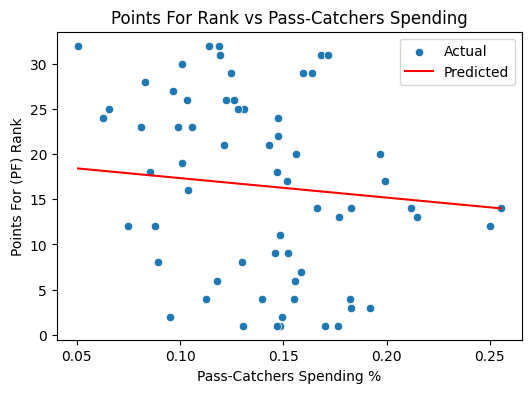

Correlation between Skill Positions Spending and Points For: -0.2552

Model Performance: Points For vs Skill Positions
MSE: 91.40
R²: 0.0857
Intercept: 26.87, Skill_Positions Coef: -37.44


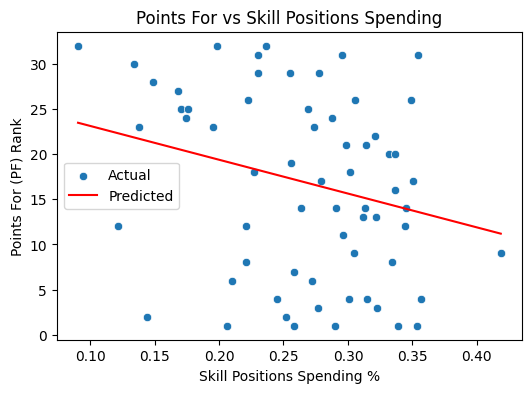

Correlation between QB Spending and Points For: -0.1656

Model Performance: Points For vs QB
MSE: 96.30
R²: 0.0367
Intercept: 19.18, QB Coef: -29.28


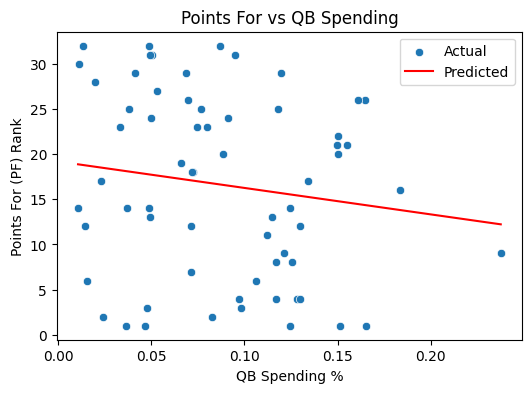

Correlation between D-Line Spending and Points Against: -0.1609

Model Performance: Points Against vs D-Line
MSE: 91.65
R²: 0.0206
Intercept: 21.17, D-Line Coef: -25.81


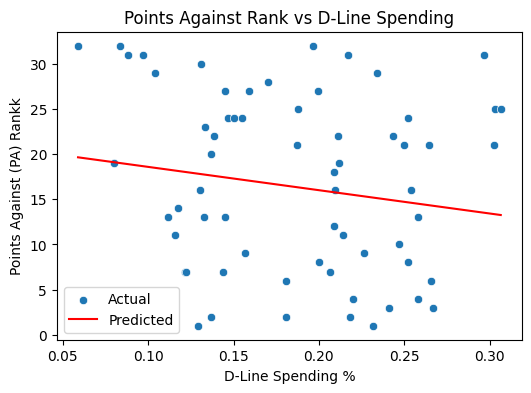

Correlation between Front-7 Spending and Points Against: -0.1715

Model Performance: Points Against vs Front-7
MSE: 90.20
R²: 0.0361
Intercept: 22.47, Front-7 Coef: -24.04


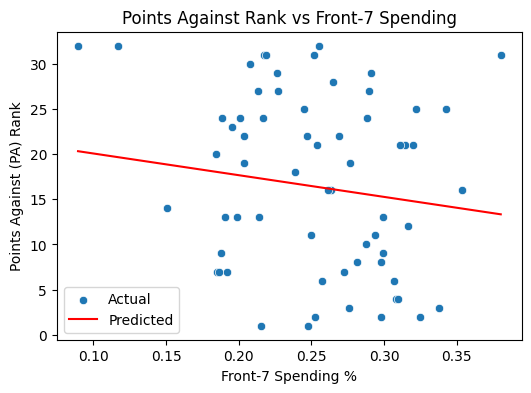

Correlation between Secondary Spending and Points Against: -0.2117

Model Performance: Points Against vs Secondary
MSE: 98.78
R²: -0.0556
Intercept: 23.46, Secondary Coef: -48.12


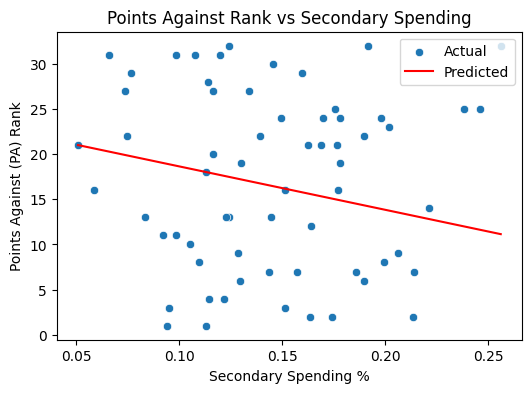

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
df = pd.read_excel('NFL Salary By Position Group.xlsx', engine='openpyxl')

# --- 1. Points For vs Pass-Catchers Spending ---
X_pass_catchers = df[['Pass-Catcher_P']]
y_pf = df['PF_Rank']  # Assuming 'PF' is the column for Points For

# Calculate and print correlation coefficient
correlation_pf_pass_catchers = df['Pass-Catcher_P'].corr(df['PF_Rank'])
print(f"Correlation between Pass-Catchers Spending and Points For: {correlation_pf_pass_catchers:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_pass_catchers, y_pf, test_size=0.2, random_state=42)
model_pf_wc = LinearRegression()
model_pf_wc.fit(X_train, y_train)
y_pred_pf_wc = model_pf_wc.predict(X_test)

print("\nModel Performance: Points For vs Pass-Catchers")
print(f"MSE: {mean_squared_error(y_test, y_pred_pf_wc):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pf_wc):.4f}")
print(f"Intercept: {model_pf_wc.intercept_:.2f}, Pass-Catchers Coef: {model_pf_wc.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Pass-Catcher_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Pass-Catcher_P'], y=y_pred_pf_wc, color="red", label="Predicted")
plt.xlabel("Pass-Catchers Spending %")
plt.ylabel("Points For (PF) Rank")
plt.title("Points For Rank vs Pass-Catchers Spending")
plt.legend()
plt.show()

# --- 2. Points For vs Skill Positions Spending ---
X_skill_positions = df[['Skill_Pos_Offense_P']]
# Calculate and print correlation coefficient
correlation_pf_skill_positions = df['Skill_Pos_Offense_P'].corr(df['PF_Rank'])
print(f"Correlation between Skill Positions Spending and Points For: {correlation_pf_skill_positions:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_skill_positions, y_pf, test_size=0.2, random_state=42)
model_pf_wsp = LinearRegression()
model_pf_wsp.fit(X_train, y_train)
y_pred_pf_wsp = model_pf_wsp.predict(X_test)

print("\nModel Performance: Points For vs Skill Positions")
print(f"MSE: {mean_squared_error(y_test, y_pred_pf_wsp):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pf_wsp):.4f}")
print(f"Intercept: {model_pf_wsp.intercept_:.2f}, Skill_Positions Coef: {model_pf_wsp.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Skill_Pos_Offense_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Skill_Pos_Offense_P'], y=y_pred_pf_wsp, color="red", label="Predicted")
plt.xlabel("Skill Positions Spending %")
plt.ylabel("Points For (PF) Rank")
plt.title("Points For vs Skill Positions Spending")
plt.legend()
plt.show()

# --- 6. Points For vs QB Spending ---
X_qb = df[['QB_P']]
# Calculate and print correlation coefficient
correlation_pf_qb = df['QB_P'].corr(df['PF_Rank'])
print(f"Correlation between QB Spending and Points For: {correlation_pf_qb:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_qb, y_pf, test_size=0.2, random_state=42)
model_pf_qb = LinearRegression()
model_pf_qb.fit(X_train, y_train)
y_pred_pf_qb = model_pf_qb.predict(X_test)

print("\nModel Performance: Points For vs QB")
print(f"MSE: {mean_squared_error(y_test, y_pred_pf_qb):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pf_qb):.4f}")
print(f"Intercept: {model_pf_qb.intercept_:.2f}, QB Coef: {model_pf_qb.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['QB_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['QB_P'], y=y_pred_pf_qb, color="red", label="Predicted")
plt.xlabel("QB Spending %")
plt.ylabel("Points For (PF) Rank")
plt.title("Points For vs QB Spending")
plt.legend()
plt.show()

# ----- POINTS AGAINST -------

# --- 9. Points Against vs D-Line Spending ---
X_dline = df[['D-Line_P']]
y_pa = df['PA_Rank']  # Assuming 'PA' is the column for Points Against

# Calculate and print correlation coefficient
correlation_pa_dline = df['D-Line_P'].corr(df['PA_Rank'])
print(f"Correlation between D-Line Spending and Points Against: {correlation_pa_dline:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_dline, y_pa, test_size=0.2, random_state=42)
model_pa_wd = LinearRegression()
model_pa_wd.fit(X_train, y_train)
y_pred_pa_wd = model_pa_wd.predict(X_test)

print("\nModel Performance: Points Against vs D-Line")
print(f"MSE: {mean_squared_error(y_test, y_pred_pa_wd):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pa_wd):.4f}")
print(f"Intercept: {model_pa_wd.intercept_:.2f}, D-Line Coef: {model_pa_wd.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['D-Line_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['D-Line_P'], y=y_pred_pa_wd, color="red", label="Predicted")
plt.xlabel("D-Line Spending %")
plt.ylabel("Points Against (PA) Rankk")
plt.title("Points Against Rank vs D-Line Spending")
plt.legend()
plt.show()

# --- 10. Points Against vs Front-7 Spending ---
X_front7 = df[['Front-7_P']]
# Calculate and print correlation coefficient
correlation_pa_front7 = df['Front-7_P'].corr(df['PA_Rank'])
print(f"Correlation between Front-7 Spending and Points Against: {correlation_pa_front7:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_front7, y_pa, test_size=0.2, random_state=42)
model_pa_wf = LinearRegression()
model_pa_wf.fit(X_train, y_train)
y_pred_pa_wf = model_pa_wf.predict(X_test)

print("\nModel Performance: Points Against vs Front-7")
print(f"MSE: {mean_squared_error(y_test, y_pred_pa_wf):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pa_wf):.4f}")
print(f"Intercept: {model_pa_wf.intercept_:.2f}, Front-7 Coef: {model_pa_wf.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Front-7_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Front-7_P'], y=y_pred_pa_wf, color="red", label="Predicted")
plt.xlabel("Front-7 Spending %")
plt.ylabel("Points Against (PA) Rank")
plt.title("Points Against Rank vs Front-7 Spending")
plt.legend()
plt.show()

# --- 11. Points Against vs Secondary Spending ---
X_secondary = df[['Secondary_P']]
# Calculate and print correlation coefficient
correlation_pa_secondary = df['Secondary_P'].corr(df['PA_Rank'])
print(f"Correlation between Secondary Spending and Points Against: {correlation_pa_secondary:.4f}")

X_train, X_test, y_train, y_test = train_test_split(X_secondary, y_pa, test_size=0.2, random_state=42)
model_pa_ws = LinearRegression()
model_pa_ws.fit(X_train, y_train)
y_pred_pa_ws = model_pa_ws.predict(X_test)

print("\nModel Performance: Points Against vs Secondary")
print(f"MSE: {mean_squared_error(y_test, y_pred_pa_ws):.2f}")
print(f"R²: {r2_score(y_test, y_pred_pa_ws):.4f}")
print(f"Intercept: {model_pa_ws.intercept_:.2f}, Secondary Coef: {model_pa_ws.coef_[0]:.2f}")

# Visualization
plt.figure(figsize=(6,4))
sns.scatterplot(x=X_test['Secondary_P'], y=y_test, label="Actual")
sns.lineplot(x=X_test['Secondary_P'], y=y_pred_pa_ws, color="red", label="Predicted")
plt.xlabel("Secondary Spending %")
plt.ylabel("Points Against (PA) Rank")
plt.title("Points Against Rank vs Secondary Spending")
plt.legend()
plt.show()

# Linear Regression using Splitting (Positional Groups Predciting PA & PF Rank)


PF Rank vs Pass_Catcher_P: grouped by Season
Pearson r: -0.1489 | Spearman rho: -0.1420 (p=0.011)
CV R² (mean): 0.0140 | CV MSE (mean): 84.301
Intercept: 20.939 | Coef[Pass_Catcher_P]: -31.789


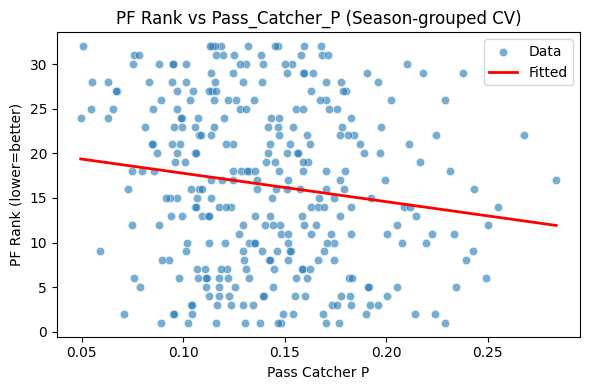


PF Rank vs Skill_Pos_Offense_P: grouped by Season
Pearson r: -0.2552 | Spearman rho: -0.2367 (p=1.89e-05)
CV R² (mean): 0.0625 | CV MSE (mean): 80.160
Intercept: 27.130 | Coef[Skill_Pos_Offense_P]: -38.720


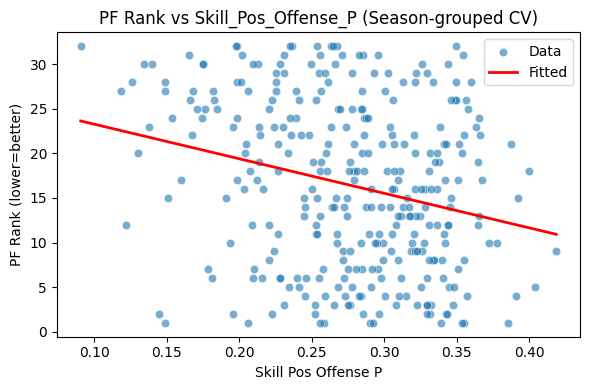


PF Rank vs QB_P: grouped by Season
Pearson r: -0.1656 | Spearman rho: -0.1647 (p=0.00313)
CV R² (mean): 0.0239 | CV MSE (mean): 83.454
Intercept: 19.359 | Coef[QB_P]: -31.510


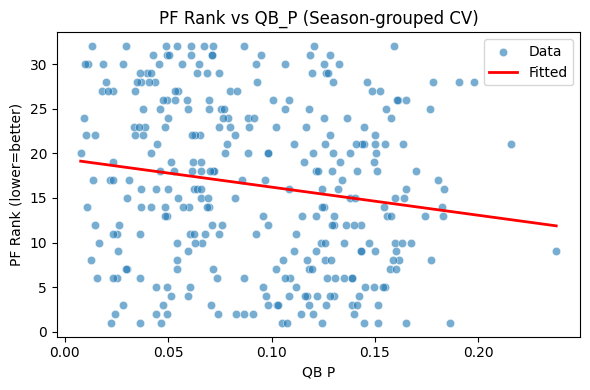


PA Rank vs D_Line_P: grouped by Season
Pearson r: -0.1609 | Spearman rho: -0.1532 (p=0.00603)
CV R² (mean): 0.0214 | CV MSE (mean): 83.063
Intercept: 21.306 | Coef[D_Line_P]: -25.803


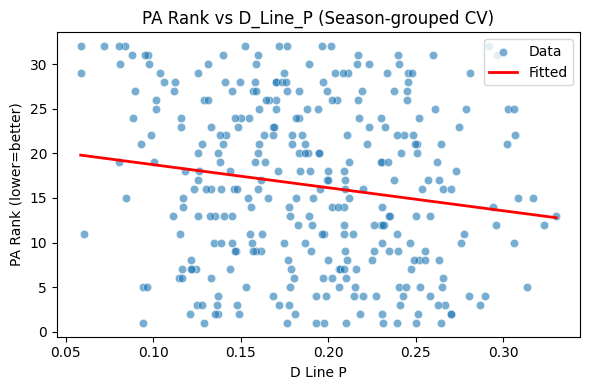


PA Rank vs Front_7_P: grouped by Season
Pearson r: -0.1715 | Spearman rho: -0.1661 (p=0.00288)
CV R² (mean): 0.0271 | CV MSE (mean): 82.587
Intercept: 23.233 | Coef[Front_7_P]: -26.483


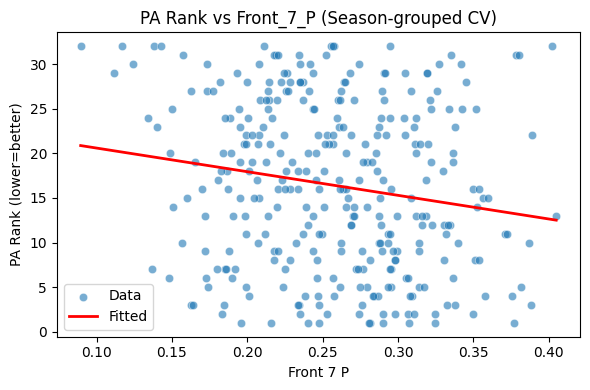


PA Rank vs Secondary_P: grouped by Season
Pearson r: -0.2117 | Spearman rho: -0.1989 (p=0.000344)
CV R² (mean): 0.0432 | CV MSE (mean): 81.239
Intercept: 22.316 | Coef[Secondary_P]: -39.686


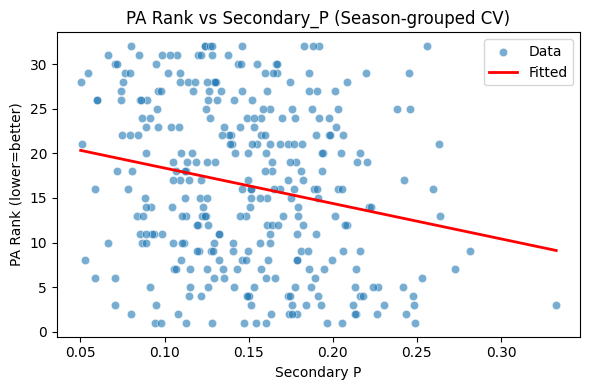

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
df = pd.read_excel('NFL Salary By Position Group.xlsx', engine='openpyxl', sheet_name=0)

# --- Clean/standardize column names to match your code ---
rename_map = {
    'Pass-Catcher\\P': 'Pass_Catcher_P',
    'Skill\\Pos\\Offense\\P': 'Skill_Pos_Offense_P',
    'QB\\P': 'QB_P',
    'D-Line\\P': 'D_Line_P',
    'Front-7\\P': 'Front_7_P',
    'Secondary\\P': 'Secondary_P',
    'Offense\\P': 'Offense_P',
    'Defense\\P': 'Defense_P',
    'PF\\Rank': 'PF_Rank',
}
df = df.rename(columns=rename_map)

# If there are any remaining backslashes or hyphens, normalize them too
df.columns = (
    df.columns
      .str.replace('\\', '_', regex=False)
      .str.replace('-', '_', regex=False)
)

# --- Basic checks ---
required = ['PF_Rank', 'PA_Rank', 'Pass_Catcher_P', 'Skill_Pos_Offense_P', 'QB_P',
            'D_Line_P', 'Front_7_P', 'Secondary_P']
missing = [c for c in required if c not in df.columns]
if missing:
    raise ValueError(f"Missing expected columns: {missing}\nAvailable: {list(df.columns)}")

# Optional: ensure Season exists for grouped CV
USE_GROUP_KFOLD = 'Season' in df.columns

# --- Helper for one-feature model on a rank target ---
def run_model(feature_col, target_col, target_label):
    d = df[[feature_col, target_col] + (['Season'] if USE_GROUP_KFOLD else [])].dropna()

    X = d[[feature_col]].values
    y = d[target_col].values

    # Correlations
    pearson = d[feature_col].corr(d[target_col])
    spearman, spearman_p = spearmanr(d[feature_col], d[target_col], nan_policy='omit')

    if USE_GROUP_KFOLD:
        # Grouped CV by Season: show average metrics over folds
        gkf = GroupKFold(n_splits=5 if d['Season'].nunique() >= 5 else d['Season'].nunique())
        r2s, mses = [], []
        for train_idx, test_idx in gkf.split(X, y, groups=d['Season'].values):
            model = LinearRegression()
            model.fit(X[train_idx], y[train_idx])
            y_pred = model.predict(X[test_idx])
            r2s.append(r2_score(y[test_idx], y_pred))
            mses.append(mean_squared_error(y[test_idx], y_pred))
        print(f"\n{target_label} vs {feature_col}: grouped by Season")
        print(f"Pearson r: {pearson:.4f} | Spearman rho: {spearman:.4f} (p={spearman_p:.3g})")
        print(f"CV R² (mean): {np.mean(r2s):.4f} | CV MSE (mean): {np.mean(mses):.3f}")
        # Fit once on all data for coefficient display
        model = LinearRegression().fit(X, y)
        print(f"Intercept: {model.intercept_:.3f} | Coef[{feature_col}]: {model.coef_[0]:.3f}")

        # Plot on all data (fitted line)
        order = np.argsort(X[:, 0])
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=X[:,0], y=y, alpha=0.6, label="Data")
        plt.plot(X[order,0], model.predict(X[order]), color="red", label="Fitted", linewidth=2)
        plt.xlabel(feature_col.replace('_', ' '))
        plt.ylabel(f"{target_label} (lower=better)")
        plt.title(f"{target_label} vs {feature_col} (Season-grouped CV)")
        plt.legend()
        plt.tight_layout()
        plt.show()

    else:
        # Simple holdout split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        print(f"\n{target_label} vs {feature_col}")
        print(f"Pearson r: {pearson:.4f} | Spearman rho: {spearman:.4f} (p={spearman_p:.3g})")
        print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
        print(f"R²: {r2_score(y_test, y_pred):.4f}")
        print(f"Intercept: {model.intercept_:.3f} | Coef[{feature_col}]: {model.coef_[0]:.3f}")

        # Plot with x-sorted fitted line
        order = np.argsort(X_test[:, 0])
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=X_test[:,0], y=y_test, label="Actual", alpha=0.7)
        plt.plot(X_test[order,0], y_pred[order], color="red", label="Predicted", linewidth=2)
        plt.xlabel(feature_col.replace('_', ' '))
        plt.ylabel(f"{target_label} (lower=better)")
        plt.title(f"{target_label} vs {feature_col}")
        plt.legend()
        plt.tight_layout()
        plt.show()

# --- PF_Rank models (lower is better) ---
run_model('Pass_Catcher_P', 'PF_Rank', 'PF Rank')
run_model('Skill_Pos_Offense_P', 'PF_Rank', 'PF Rank')
run_model('QB_P', 'PF_Rank', 'PF Rank')

# --- PA_Rank models (lower is better) ---
run_model('D_Line_P', 'PA_Rank', 'PA Rank')
run_model('Front_7_P', 'PA_Rank', 'PA Rank')
run_model('Secondary_P', 'PA_Rank', 'PA Rank')

# New Section


Model Performance: Points For Prediction
MSE: 6146.42
R²: 0.0070
Intercept: 381.63, Coefficients: [-18.45487905 -27.36482351  45.81970256]


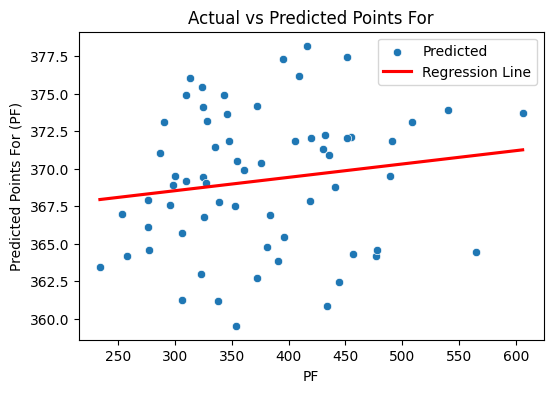


Model Performance: Points Against Prediction
MSE: 3867.87
R²: -0.0485
Intercept: 353.32, Coefficients: [-88.90699482 121.63529881 -32.72830399]


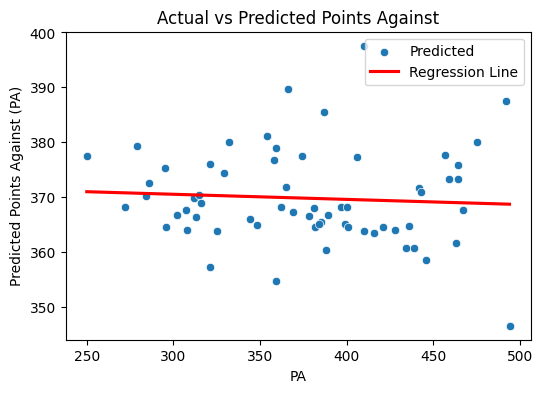

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load Data ---
df = pd.read_excel('NFL Salary By Position Group.xlsx', engine='openpyxl')

# Calculate total offense and defense spending percentages
df['Total_Offense_P'] = df[['Pass-Catcher_P', 'Skill_Pos_Offense_P', 'QB_P']].sum(axis=1)
df['Total_Defense_P'] = df[['D-Line_P', 'Front-7_P', 'Secondary_P']].sum(axis=1)

# Calculate percentage contributions
df['Pass-Catcher_Contribution'] = df['Pass-Catcher_P'] / df['Total_Offense_P']
df['Skill_Pos_Offense_Contribution'] = df['Skill_Pos_Offense_P'] / df['Total_Offense_P']
df['QB_Contribution'] = df['QB_P'] / df['Total_Offense_P']

df['D-Line_Contribution'] = df['D-Line_P'] / df['Total_Defense_P']
df['Front_7_Contribution'] = df['Front-7_P'] / df['Total_Defense_P']
df['Secondary_Contribution'] = df['Secondary_P'] / df['Total_Defense_P']

# --- Points For Prediction ---
# Define features for Points For
X_pf = df[['Pass-Catcher_Contribution', 'Skill_Pos_Offense_Contribution', 'QB_Contribution']]
y_pf = df['PF']  # Assuming 'PF' is the column for Points For

# Train-test split
X_train_pf, X_test_pf, y_train_pf, y_test_pf = train_test_split(X_pf, y_pf, test_size=0.2, random_state=42)

# Train model
model_pf = LinearRegression()
model_pf.fit(X_train_pf, y_train_pf)
y_pred_pf = model_pf.predict(X_test_pf)

# Model performance for Points For
print("\nModel Performance: Points For Prediction")
print(f"MSE: {mean_squared_error(y_test_pf, y_pred_pf):.2f}")
print(f"R²: {r2_score(y_test_pf, y_pred_pf):.4f}")
print(f"Intercept: {model_pf.intercept_:.2f}, Coefficients: {model_pf.coef_}")

# Visualization with regression line
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pf, y=y_pred_pf, label="Predicted")
plt.xlabel("Actual Points For (PF)")
plt.ylabel("Predicted Points For (PF)")
plt.title("Actual vs Predicted Points For")

# Add a regression line
sns.regplot(x=y_test_pf, y=y_pred_pf, scatter=False, color='red', label='Regression Line', ci=None)
plt.legend()
plt.show()

# --- Points Against Prediction ---
# Define features for Points Against
X_pa = df[['D-Line_Contribution', 'Front_7_Contribution', 'Secondary_Contribution']]
y_pa = df['PA']  # Assuming 'PA' is the column for Points Against

# Train-test split
X_train_pa, X_test_pa, y_train_pa, y_test_pa = train_test_split(X_pa, y_pa, test_size=0.2, random_state=42)

# Train model
model_pa = LinearRegression()
model_pa.fit(X_train_pa, y_train_pa)
y_pred_pa = model_pa.predict(X_test_pa)

# Model performance for Points Against
print("\nModel Performance: Points Against Prediction")
print(f"MSE: {mean_squared_error(y_test_pa, y_pred_pa):.2f}")
print(f"R²: {r2_score(y_test_pa, y_pred_pa):.4f}")
print(f"Intercept: {model_pa.intercept_:.2f}, Coefficients: {model_pa.coef_}")

# Visualization with regression line
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_pa, y=y_pred_pa, label="Predicted")
plt.xlabel("Actual Points Against (PA)")
plt.ylabel("Predicted Points Against (PA)")
plt.title("Actual vs Predicted Points Against")

# Add a regression line
sns.regplot(x=y_test_pa, y=y_pred_pa, scatter=False, color='red', label='Regression Line', ci=None)
plt.legend()
plt.show()


Edge Player Model Performance:
Mean Squared Error: 0.0438
R² Score: 0.0417

Model Coefficients:
Intercept: 0.4175
EDGE_P Coefficient: 0.8537


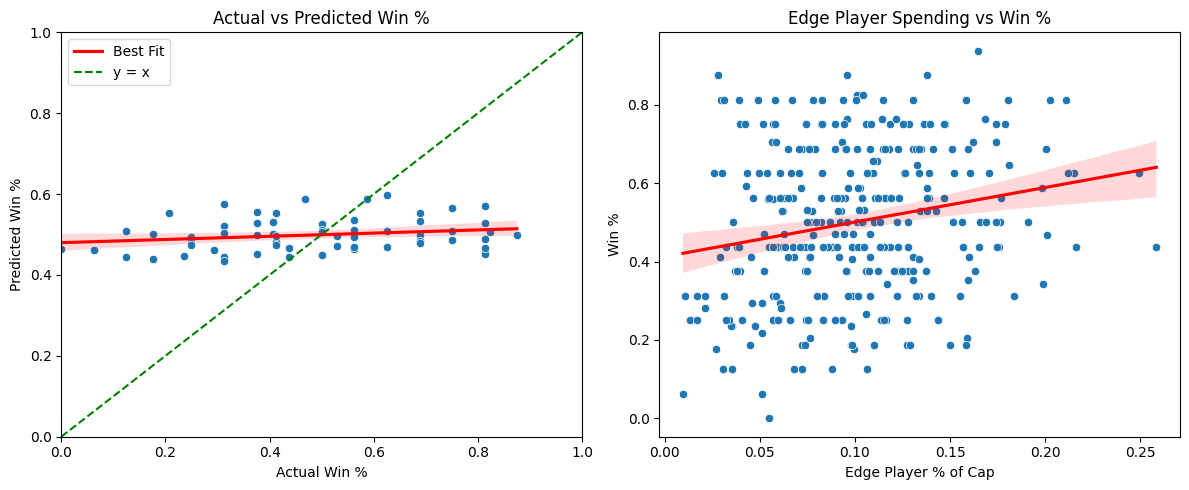

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicted Win % for EDGE_P=8%: 0.486

Descriptive Statistics for EDGE_P:
count    320.000000
mean       0.099427
std        0.045205
min        0.009667
25%        0.065648
50%        0.096189
75%        0.127802
max        0.258367
Name: EDGE_P, dtype: float64

Correlation between EDGE_P and W_PCT: 0.2089


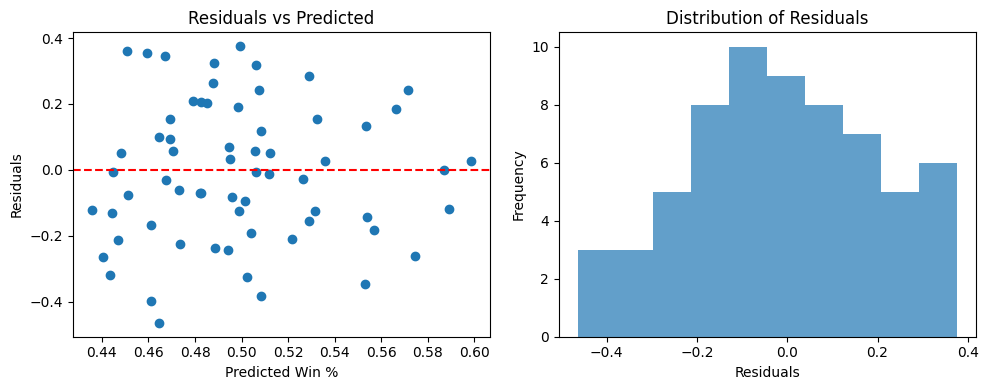


=== ANALYSIS SUMMARY ===
✓ Teams that spend more on edge players tend to win more games
  For every 1% increase in edge player spending, win % increases by 0.8537

Model explains 4.2% of the variance in win percentage


'\n# Compare with previous Offense/Defense model\nprint("\n=== MODEL COMPARISON ===")\nprint("Previous Model (Offense_P + Defense_P):")\nprint(f"  R² Score: [Insert your previous R² here]")\nprint(f"Edge Player Model (EDGE_P only):")\nprint(f"  R² Score: {r2:.4f}")\n'

In [ ]:
# NFL Edge Player Analysis - Predicting Wins using EDGE_P
# Following the same structure as the Offense/Defense analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- Load Data ---
df = pd.read_excel('NFL Salary By Position Group.xlsx', engine='openpyxl')

# --- STEP 4: Select Features & Target ---
X = df[['EDGE_P']]  # Feature: Edge Player percent of cap
y = df['W_PCT']     # Target: Win percentage

# --- STEP 5: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 6: Train Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- STEP 7: Predictions ---
y_pred = model.predict(X_test)

# --- STEP 8: Evaluate Model ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nEdge Player Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- STEP 9: Coefficients ---
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"EDGE_P Coefficient: {model.coef_[0]:.4f}")

# Interpretation:
# Positive coefficient -> spending more on edge players tends to increase W_PCT
# Negative coefficient -> spending more on edge players tends to decrease W_PCT

# --- STEP 10: Visualization ---
plt.figure(figsize=(12, 5))

# First subplot: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Best Fit')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='y = x')
plt.xlabel('Actual Win %')
plt.ylabel('Predicted Win %')
plt.title('Actual vs Predicted Win %')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

# Second subplot: EDGE_P vs Win %
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='EDGE_P', y='W_PCT')
sns.regplot(data=df, x='EDGE_P', y='W_PCT', scatter=False, color='red')
plt.xlabel('Edge Player % of Cap')
plt.ylabel('Win %')
plt.title('Edge Player Spending vs Win %')

plt.tight_layout()
plt.show()

# --- STEP 11: Example Prediction ---
example_edge_pct = np.array([[0.08]])  # 8% of cap spent on edge players (adjust as needed)
predicted_win_pct = model.predict(example_edge_pct)[0]
print(f"\nPredicted Win % for EDGE_P=8%: {predicted_win_pct:.3f}")

# --- Additional Analysis: Descriptive Statistics ---
print("\nDescriptive Statistics for EDGE_P:")
print(df['EDGE_P'].describe())

print(f"\nCorrelation between EDGE_P and W_PCT: {df['EDGE_P'].corr(df['W_PCT']):.4f}")

# --- STEP 12: Residuals Analysis ---
plt.figure(figsize=(10, 4))

# Residuals plot
plt.subplot(1, 2, 1)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Win %')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# Distribution of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=10, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# --- STEP 13: Feature Importance Interpretation ---
print("\n=== ANALYSIS SUMMARY ===")
if model.coef_[0] > 0:
    print(f"✓ Teams that spend more on edge players tend to win more games")
    print(f"  For every 1% increase in edge player spending, win % increases by {model.coef_[0]:.4f}")
else:
    print(f"✗ Teams that spend more on edge players tend to win fewer games")
    print(f"  For every 1% increase in edge player spending, win % decreases by {abs(model.coef_[0]):.4f}")

print(f"\nModel explains {r2*100:.1f}% of the variance in win percentage")

# --- STEP 14: Model Comparison (if you want to compare with your previous model) ---
# Uncomment and modify if you want to compare models
"""
# Compare with previous Offense/Defense model
print("\n=== MODEL COMPARISON ===")
print("Previous Model (Offense_P + Defense_P):")
print(f"  R² Score: [Insert your previous R² here]")
print(f"Edge Player Model (EDGE_P only):")
print(f"  R² Score: {r2:.4f}")
"""


Dead/Open/Specials Model Performance:
Mean Squared Error: 0.0395
R² Score: 0.1350

Model Coefficients:
Intercept: 0.6109
Dead_Open_Specials Coefficient: -0.6916


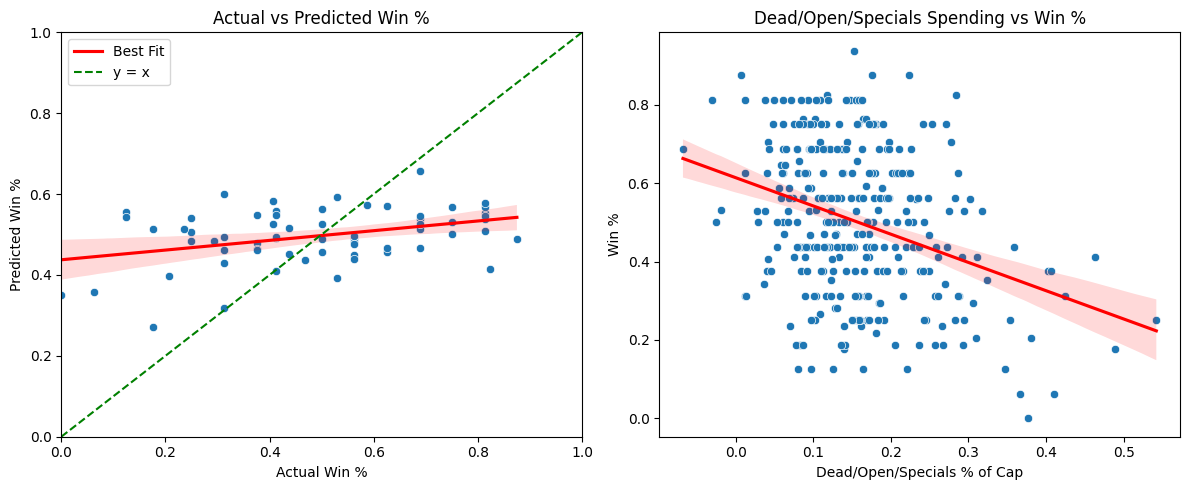

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(



Predicted Win % for Dead_Open_Specials=15%: 0.507

Descriptive Statistics for Dead_Open_Specials:
count    320.000000
mean       0.157852
std        0.088095
min       -0.067845
25%        0.097288
50%        0.146935
75%        0.198705
max        0.542165
Name: Dead_Open_Specials, dtype: float64

Correlation between Dead_Open_Specials and W_PCT: -0.3328


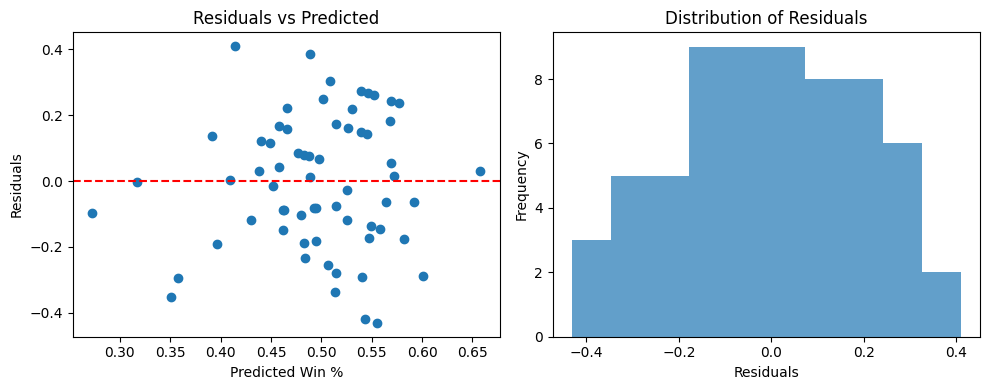


=== ANALYSIS SUMMARY ===
📉 Teams with more dead money/open cap/special teams spending tend to win fewer games
   For every 1% increase in Dead/Open/Specials, win % decreases by 0.6916
   (This likely indicates inefficient cap allocation or roster turnover)

Model explains 13.5% of the variance in win percentage

=== CONTEXTUAL INSIGHTS ===
Dead/Open/Specials typically includes:
• Dead money from released/traded players
• Unused cap space
• Special teams unit spending
• Other miscellaneous cap allocations

A negative correlation might suggest:
• Teams with more dead money have made poor roster decisions
• Unused cap space indicates missed opportunities
• Over-investment in special teams at expense of core positions

=== MODEL COMPARISON FRAMEWORK ===
Dead/Open/Specials Model:
  R² Score: 0.1350
  Feature: Single variable (Dead_Open_Specials)
  Interpretation: Negative relationship with wins

Compare this with your other models:
• Edge Player Model (EDGE_P)
• Offense/Defense Model (Offe

In [ ]:
# NFL Dead/Open/Specials Analysis - Predicting Wins using Dead_Open_Specials
# Following the same structure as the previous analyses

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_excel('NFL Salary By Position Group.xlsx', engine='openpyxl')

# --- STEP 4: Select Features & Target ---
X = df[['Dead_Open_Specials']]  # Feature: Dead/Open/Specials cap allocation
y = df['W_PCT']                 # Target: Win percentage

# --- STEP 5: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 6: Train Linear Regression Model ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- STEP 7: Predictions ---
y_pred = model.predict(X_test)

# --- STEP 8: Evaluate Model ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nDead/Open/Specials Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

# --- STEP 9: Coefficients ---
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Dead_Open_Specials Coefficient: {model.coef_[0]:.4f}")

# Interpretation:
# Positive coefficient -> more dead money/open cap/special teams spending tends to increase W_PCT
# Negative coefficient -> more dead money/open cap/special teams spending tends to decrease W_PCT

# --- STEP 10: Visualization ---
plt.figure(figsize=(12, 5))

# First subplot: Actual vs Predicted
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='red', label='Best Fit')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='y = x')
plt.xlabel('Actual Win %')
plt.ylabel('Predicted Win %')
plt.title('Actual vs Predicted Win %')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend()

# Second subplot: Dead_Open_Specials vs Win %
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Dead_Open_Specials', y='W_PCT')
sns.regplot(data=df, x='Dead_Open_Specials', y='W_PCT', scatter=False, color='red')
plt.xlabel('Dead/Open/Specials % of Cap')
plt.ylabel('Win %')
plt.title('Dead/Open/Specials Spending vs Win %')

plt.tight_layout()
plt.show()

# --- STEP 11: Example Prediction ---
example_dead_open_pct = np.array([[0.15]])  # 15% of cap in dead/open/specials (adjust as needed)
predicted_win_pct = model.predict(example_dead_open_pct)[0]
print(f"\nPredicted Win % for Dead_Open_Specials=15%: {predicted_win_pct:.3f}")

# --- Additional Analysis: Descriptive Statistics ---
print("\nDescriptive Statistics for Dead_Open_Specials:")
print(df['Dead_Open_Specials'].describe())

print(f"\nCorrelation between Dead_Open_Specials and W_PCT: {df['Dead_Open_Specials'].corr(df['W_PCT']):.4f}")

# --- STEP 12: Residuals Analysis ---
plt.figure(figsize=(10, 4))

# Residuals plot
plt.subplot(1, 2, 1)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Win %')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')

# Distribution of residuals
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=10, alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.tight_layout()
plt.show()

# --- STEP 13: Feature Importance Interpretation ---
print("\n=== ANALYSIS SUMMARY ===")
if model.coef_[0] > 0:
    print(f"⚠️  Teams with more dead money/open cap/special teams spending tend to win more games")
    print(f"   For every 1% increase in Dead/Open/Specials, win % increases by {model.coef_[0]:.4f}")
    print(f"   (Note: This may indicate good cap management or strategic investments)")
else:
    print(f"📉 Teams with more dead money/open cap/special teams spending tend to win fewer games")
    print(f"   For every 1% increase in Dead/Open/Specials, win % decreases by {abs(model.coef_[0]):.4f}")
    print(f"   (This likely indicates inefficient cap allocation or roster turnover)")

print(f"\nModel explains {r2*100:.1f}% of the variance in win percentage")

# --- STEP 14: Additional Insights ---
print("\n=== CONTEXTUAL INSIGHTS ===")
print("Dead/Open/Specials typically includes:")
print("• Dead money from released/traded players")
print("• Unused cap space")
print("• Special teams unit spending")
print("• Other miscellaneous cap allocations")
print("\nA negative correlation might suggest:")
print("• Teams with more dead money have made poor roster decisions")
print("• Unused cap space indicates missed opportunities")
print("• Over-investment in special teams at expense of core positions")

# --- STEP 15: Model Comparison Framework ---
print("\n=== MODEL COMPARISON FRAMEWORK ===")
print(f"Dead/Open/Specials Model:")
print(f"  R² Score: {r2:.4f}")
print(f"  Feature: Single variable (Dead_Open_Specials)")
print(f"  Interpretation: {'Positive' if model.coef_[0] > 0 else 'Negative'} relationship with wins")
print("\nCompare this with your other models:")
print("• Edge Player Model (EDGE_P)")
print("• Offense/Defense Model (Offense_P + Defense_P)")

# --- STEP 16: Outlier Analysis ---
print("\n=== OUTLIER ANALYSIS ===")
# Find teams with highest and lowest Dead_Open_Specials values
high_dead_open = df.nlargest(3, 'Dead_Open_Specials')[['Dead_Open_Specials', 'W_PCT']]
low_dead_open = df.nsmallest(3, 'Dead_Open_Specials')[['Dead_Open_Specials', 'W_PCT']]

print("Teams with HIGHEST Dead/Open/Specials spending:")
print(high_dead_open)
print("\nTeams with LOWEST Dead/Open/Specials spending:")
print(low_dead_open)

# Salary data


Loading data files...
Salary data shape: (36544, 11)
Team stats shape: (320, 45)

Salary data after cleaning: 36544 rows


/tmp/ipython-input-2660891759.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10_spending = salary_data.groupby(['team', 'year']).apply(
/tmp/ipython-input-2660891759.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_stats = merged_data.groupby('Spending_Quartile')['W_PCT'].mean()



Top 10 spending calculated for 319 team-years

Sample of top 10 spending:
    team  year  Top10_Salary
0  49ers  2013      34622000
1  49ers  2014      34155500
2  49ers  2015      41584000
3  49ers  2016      46484000
4  49ers  2017      31698000
5  49ers  2018      46601000
6  49ers  2019      66375412
7  49ers  2020      72095753
8  49ers  2021      51440000
9  49ers  2022      52103000

Merged data shape: (319, 48)
Years covered: 2013 to 2022
Number of teams: 32

Merged data preview:
    Team  year  Top10_Salary  W_PCT   PF   PA
0  49ers  2013      34622000  0.750  406  272
1  49ers  2014      34155500  0.500  306  340
2  49ers  2015      41584000  0.313  238  387
3  49ers  2016      46484000  0.125  309  480
4  49ers  2017      31698000  0.375  331  383
5  49ers  2018      46601000  0.250  342  435
6  49ers  2019      66375412  0.813  479  310
7  49ers  2020      72095753  0.375  376  390
8  49ers  2021      51440000  0.588  427  365
9  49ers  2022      52103000  0.765  450  277


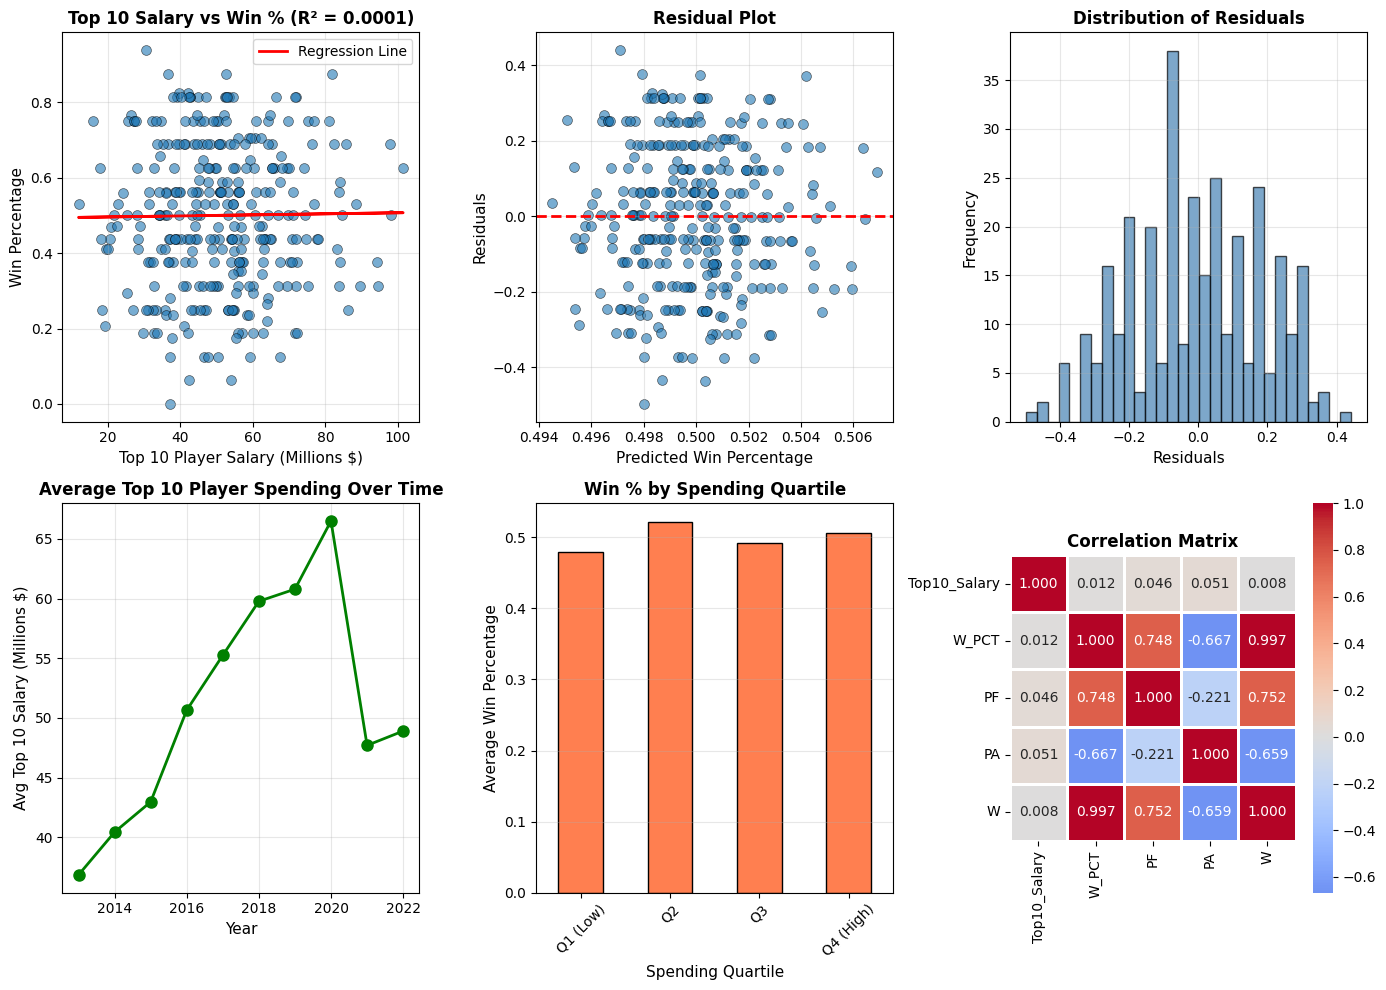


Visualization saved as 'nfl_salary_regression_analysis.png'

ADDITIONAL CORRELATIONS
Correlation with Points For (PF): 0.0464
Correlation with Points Against (PA): 0.0505
Correlation with Wins (W): 0.0084

SUMMARY STATISTICS BY SPENDING QUARTILE
                  Top10_Salary                      W_PCT     W      PF  \
                          mean       min        max  mean  mean    mean   
Spending_Quartile                                                         
Q1 (Low)           31094129.81  11979479   38879074  0.48  7.71  359.14   
Q2                 44926108.94  39070000   50525000  0.52  8.40  381.95   
Q3                 55331682.41  50702000   60900000  0.49  7.99  367.58   
Q4 (High)          72570575.19  61002000  101414000  0.51  8.12  374.42   

                       PA  
                     mean  
Spending_Quartile          
Q1 (Low)           372.78  
Q2                 367.15  
Q3                 366.46  
Q4 (High)          378.56  

Detailed results saved to 'reg

/tmp/ipython-input-2660891759.py:181: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quartile_summary = merged_data.groupby('Spending_Quartile').agg({


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
print("Loading data files...")
salary_data = pd.read_excel('merged_salaries_2013_2022_cleaned.xlsx')
team_stats = pd.read_excel('NFL Salary By Position Group.xlsx')

print("Salary data shape:", salary_data.shape)
print("Team stats shape:", team_stats.shape)

# Clean and prepare salary data
salary_data['salary'] = pd.to_numeric(salary_data['salary'], errors='coerce')
salary_data['year'] = pd.to_numeric(salary_data['year'], errors='coerce')
salary_data = salary_data.dropna(subset=['salary', 'team', 'year'])

print(f"\nSalary data after cleaning: {len(salary_data)} rows")

# Calculate top 10 highest paid players per team per year
top10_spending = salary_data.groupby(['team', 'year']).apply(
    lambda x: x.nlargest(10, 'salary')['salary'].sum()
).reset_index(name='Top10_Salary')

print("\nTop 10 spending calculated for", len(top10_spending), "team-years")
print("\nSample of top 10 spending:")
print(top10_spending.head(10))

# Clean team stats data
team_stats['Season'] = pd.to_numeric(team_stats['Season'], errors='coerce')
team_stats = team_stats.dropna(subset=['Season', 'Team', 'W_PCT'])

# Merge datasets - matching on team and year
merged_data = pd.merge(
    top10_spending,
    team_stats,
    left_on=['team', 'year'],
    right_on=['Team', 'Season'],
    how='inner'
)

print(f"\nMerged data shape: {merged_data.shape}")
print(f"Years covered: {merged_data['year'].min():.0f} to {merged_data['year'].max():.0f}")
print(f"Number of teams: {merged_data['Team'].nunique()}")

if len(merged_data) == 0:
    print("\nWARNING: No matching records found!")
    print("\nUnique teams in salary data:", sorted(salary_data['team'].unique()))
    print("\nUnique teams in stats data:", sorted(team_stats['Team'].unique()))
    print("\nYou may need to standardize team names between files.")
else:
    print("\nMerged data preview:")
    print(merged_data[['Team', 'year', 'Top10_Salary', 'W_PCT', 'PF', 'PA']].head(10))

    # Prepare data for regression
    X = merged_data[['Top10_Salary']].values
    y = merged_data['W_PCT'].values

    # Perform linear regression
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    coefficient = model.coef_[0]
    intercept = model.intercept_

    print("\n" + "="*60)
    print("LINEAR REGRESSION RESULTS")
    print("="*60)
    print(f"Coefficient: {coefficient:.2e}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"\nInterpretation:")
    print(f"For every $1M increase in top 10 player spending,")
    print(f"win percentage changes by {coefficient * 1_000_000:.6f}")

    if coefficient > 0:
        print(f"\nPositive correlation: Higher spending on top 10 players")
        print(f"is associated with higher win percentage.")
    else:
        print(f"\nNegative correlation: Higher spending on top 10 players")
        print(f"is associated with lower win percentage.")

    print(f"\nThe model explains {r2*100:.2f}% of variance in win percentage.")

    # Create visualization
    fig = plt.figure(figsize=(14, 10))

    # Scatter plot with regression line
    plt.subplot(2, 3, 1)
    plt.scatter(X / 1_000_000, y, alpha=0.6, edgecolors='k', linewidth=0.5, s=50)
    plt.plot(X / 1_000_000, y_pred, color='red', linewidth=2, label='Regression Line')
    plt.xlabel('Top 10 Player Salary (Millions $)', fontsize=11)
    plt.ylabel('Win Percentage', fontsize=11)
    plt.title(f'Top 10 Salary vs Win % (R² = {r2:.4f})', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Residual plot
    plt.subplot(2, 3, 2)
    residuals = y - y_pred
    plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='k', linewidth=0.5, s=50)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Win Percentage', fontsize=11)
    plt.ylabel('Residuals', fontsize=11)
    plt.title('Residual Plot', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Distribution of residuals
    plt.subplot(2, 3, 3)
    plt.hist(residuals, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    plt.xlabel('Residuals', fontsize=11)
    plt.ylabel('Frequency', fontsize=11)
    plt.title('Distribution of Residuals', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Spending by year
    plt.subplot(2, 3, 4)
    yearly_avg = merged_data.groupby('year')['Top10_Salary'].mean()
    plt.plot(yearly_avg.index, yearly_avg.values / 1_000_000, marker='o',
             linewidth=2, markersize=8, color='green')
    plt.xlabel('Year', fontsize=11)
    plt.ylabel('Avg Top 10 Salary (Millions $)', fontsize=11)
    plt.title('Average Top 10 Player Spending Over Time', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Win % distribution by spending quartile
    plt.subplot(2, 3, 5)
    merged_data['Spending_Quartile'] = pd.qcut(merged_data['Top10_Salary'],
                                                 q=4, labels=['Q1 (Low)', 'Q2', 'Q3', 'Q4 (High)'])
    quartile_stats = merged_data.groupby('Spending_Quartile')['W_PCT'].mean()
    quartile_stats.plot(kind='bar', color='coral', edgecolor='black')
    plt.xlabel('Spending Quartile', fontsize=11)
    plt.ylabel('Average Win Percentage', fontsize=11)
    plt.title('Win % by Spending Quartile', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')

    # Correlation heatmap with other variables
    plt.subplot(2, 3, 6)
    corr_vars = ['Top10_Salary', 'W_PCT', 'PF', 'PA', 'W']
    corr_matrix = merged_data[corr_vars].corr()
    sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm',
                center=0, square=True, linewidths=1)
    plt.title('Correlation Matrix', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.savefig('nfl_salary_regression_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n" + "="*60)
    print("Visualization saved as 'nfl_salary_regression_analysis.png'")
    print("="*60)

    # Additional correlations
    print("\n" + "="*60)
    print("ADDITIONAL CORRELATIONS")
    print("="*60)

    corr_pf = merged_data['Top10_Salary'].corr(merged_data['PF'])
    corr_pa = merged_data['Top10_Salary'].corr(merged_data['PA'])
    corr_wins = merged_data['Top10_Salary'].corr(merged_data['W'])

    print(f"Correlation with Points For (PF): {corr_pf:.4f}")
    print(f"Correlation with Points Against (PA): {corr_pa:.4f}")
    print(f"Correlation with Wins (W): {corr_wins:.4f}")

    # Summary statistics by quartile
    print("\n" + "="*60)
    print("SUMMARY STATISTICS BY SPENDING QUARTILE")
    print("="*60)
    quartile_summary = merged_data.groupby('Spending_Quartile').agg({
        'Top10_Salary': ['mean', 'min', 'max'],
        'W_PCT': 'mean',
        'W': 'mean',
        'PF': 'mean',
        'PA': 'mean'
    }).round(2)
    print(quartile_summary)

    # Export results
    results_df = merged_data[['Team', 'year', 'Top10_Salary', 'W_PCT', 'W', 'PF', 'PA']].copy()
    results_df['Predicted_Win_Pct'] = y_pred
    results_df['Residual'] = residuals
    results_df['Top10_Salary_Millions'] = results_df['Top10_Salary'] / 1_000_000
    results_df = results_df.sort_values(['year', 'Team'])
    results_df.to_csv('regression_results.csv', index=False)

    print("\n" + "="*60)
    print("Detailed results saved to 'regression_results.csv'")
    print("="*60)

Loading data files...
Salary data shape: (36544, 11)
Team stats shape: (320, 45)

Salary data after cleaning: 36544 rows


/tmp/ipython-input-3162408355.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top10_spending = salary_data.groupby(['team', 'year']).apply(
/tmp/ipython-input-3162408355.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = merged_data.groupby('Spending_Bin').agg({
/tmp/ipython-input-3162408355.py:183: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t


Top 10 spending calculated for 319 team-years

Sample with percentages:
    team  year  Top10_Salary  Total_Salary  Top10_Pct
0  49ers  2013      34622000      64844036  53.392728
1  49ers  2014      34155500      77435243  44.108469
2  49ers  2015      41584000      73956868  56.227368
3  49ers  2016      46484000      88426463  52.567974
4  49ers  2017      31698000      71920311  44.073780
5  49ers  2018      46601000      87944879  52.988873
6  49ers  2019      66375412     116156336  57.143170
7  49ers  2020      72095753     121194011  59.487884
8  49ers  2021      51440000      95850602  53.666851
9  49ers  2022      52103000     100128459  52.036155

Merged data shape: (319, 50)
Years covered: 2013 to 2022
Number of teams: 32

Merged data preview:
    Team  year  Top10_Pct  W_PCT   W
0  49ers  2013  53.392728  0.750  12
1  49ers  2014  44.108469  0.500   8
2  49ers  2015  56.227368  0.313   5
3  49ers  2016  52.567974  0.125   2
4  49ers  2017  44.073780  0.375   6
5  49ers  2

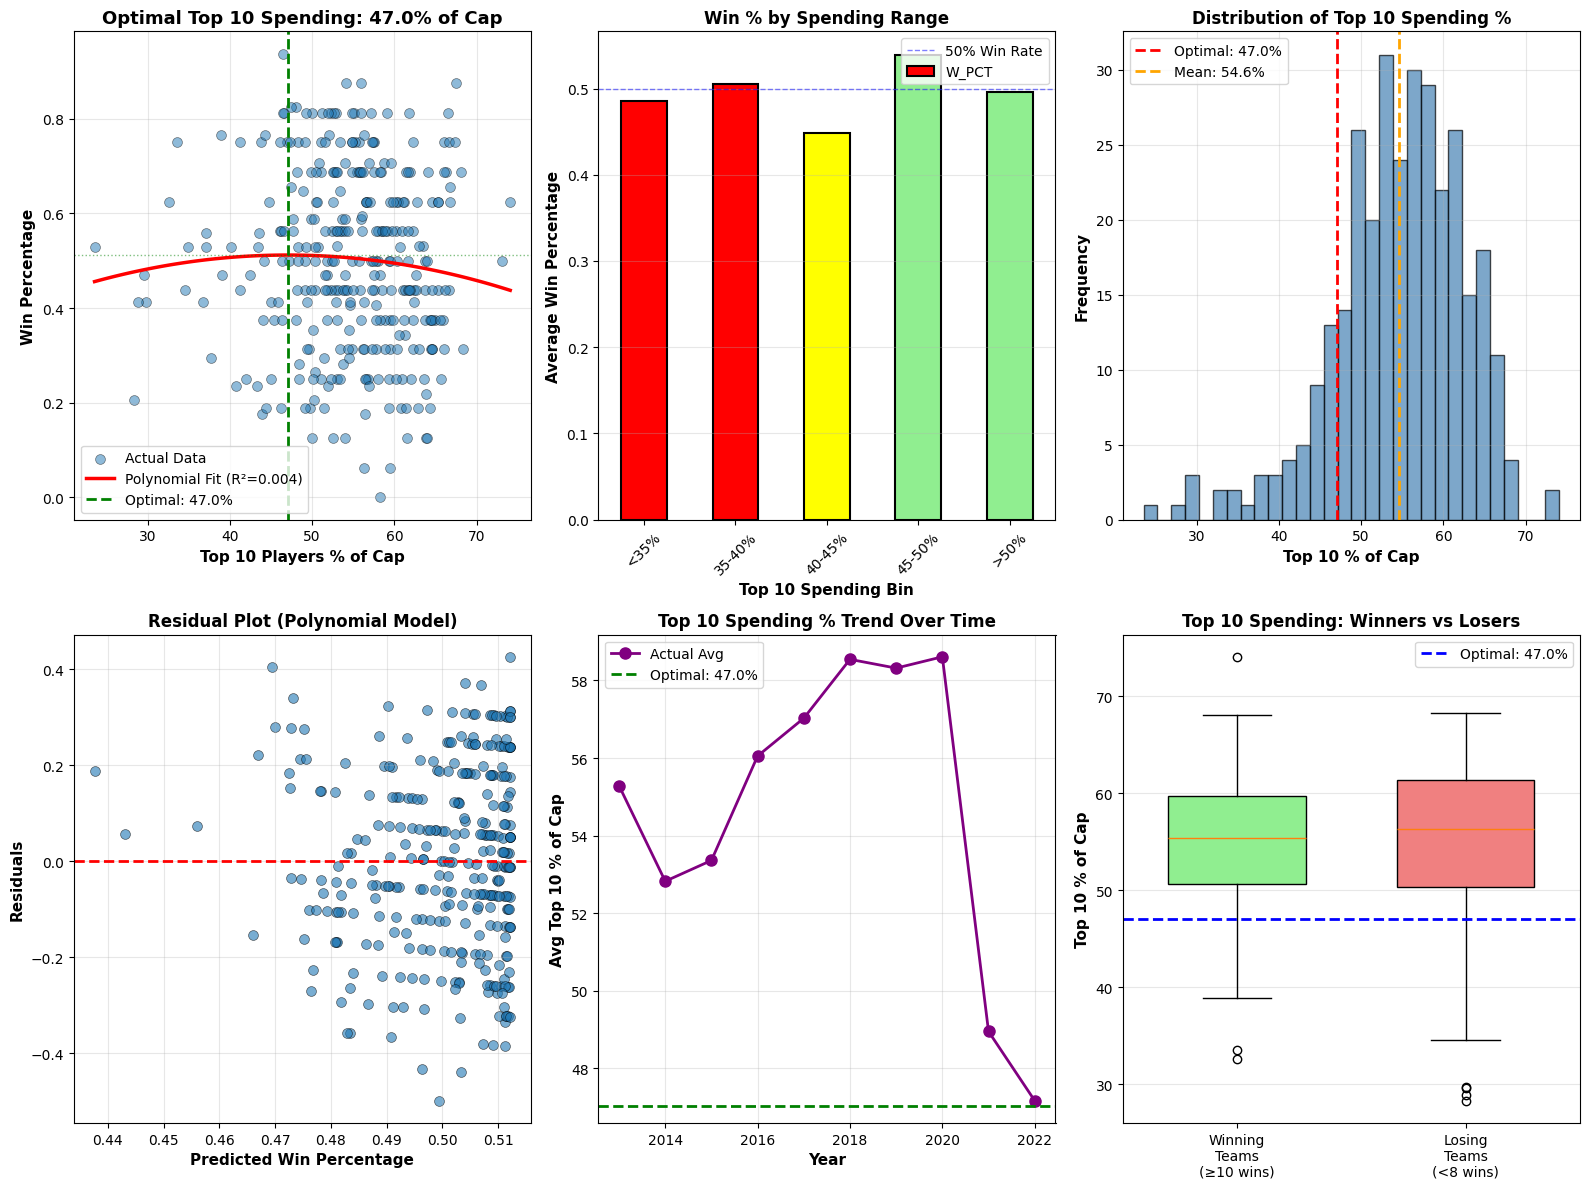


Visualization saved as 'optimal_top10_spending_analysis.png'

Detailed results saved to 'optimal_spending_analysis_results.csv'

📊 KEY FINDINGS
✓ Optimal top 10 spending: 47.0% of salary cap
✓ Current league average: 54.6%
✓ Difference from optimal: 7.6%
✓ Polynomial model R²: 0.0044
✓ Expected wins at optimal: 8.2 wins (16 game season)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
print("Loading data files...")
salary_data = pd.read_excel('merged_salaries_2013_2022_cleaned.xlsx')
team_stats = pd.read_excel('NFL Salary By Position Group.xlsx')

print("Salary data shape:", salary_data.shape)
print("Team stats shape:", team_stats.shape)

# Clean and prepare salary data
salary_data['salary'] = pd.to_numeric(salary_data['salary'], errors='coerce')
salary_data['year'] = pd.to_numeric(salary_data['year'], errors='coerce')
salary_data = salary_data.dropna(subset=['salary', 'team', 'year'])

print(f"\nSalary data after cleaning: {len(salary_data)} rows")

# Calculate top 10 highest paid players per team per year
top10_spending = salary_data.groupby(['team', 'year']).apply(
    lambda x: x.nlargest(10, 'salary')['salary'].sum()
).reset_index(name='Top10_Salary')

# Calculate total team salary per year for cap percentage
total_team_salary = salary_data.groupby(['team', 'year'])['salary'].sum().reset_index(name='Total_Salary')

# Merge top 10 with total salary
top10_spending = pd.merge(top10_spending, total_team_salary, on=['team', 'year'])

# Calculate percentage of cap spent on top 10
top10_spending['Top10_Pct'] = (top10_spending['Top10_Salary'] / top10_spending['Total_Salary']) * 100

print("\nTop 10 spending calculated for", len(top10_spending), "team-years")
print("\nSample with percentages:")
print(top10_spending[['team', 'year', 'Top10_Salary', 'Total_Salary', 'Top10_Pct']].head(10))

# Clean team stats data
team_stats['Season'] = pd.to_numeric(team_stats['Season'], errors='coerce')
team_stats = team_stats.dropna(subset=['Season', 'Team', 'W_PCT'])

# Merge datasets
merged_data = pd.merge(
    top10_spending,
    team_stats,
    left_on=['team', 'year'],
    right_on=['Team', 'Season'],
    how='inner'
)

print(f"\nMerged data shape: {merged_data.shape}")
print(f"Years covered: {merged_data['year'].min():.0f} to {merged_data['year'].max():.0f}")
print(f"Number of teams: {merged_data['Team'].nunique()}")

if len(merged_data) == 0:
    print("\nWARNING: No matching records found!")
    print("\nUnique teams in salary data:", sorted(salary_data['team'].unique()))
    print("\nUnique teams in stats data:", sorted(team_stats['Team'].unique()))
else:
    print("\nMerged data preview:")
    print(merged_data[['Team', 'year', 'Top10_Pct', 'W_PCT', 'W']].head(10))

    print("\n" + "="*60)
    print("TOP 10 PERCENTAGE STATISTICS")
    print("="*60)
    print(f"Mean % of cap on top 10: {merged_data['Top10_Pct'].mean():.2f}%")
    print(f"Median % of cap on top 10: {merged_data['Top10_Pct'].median():.2f}%")
    print(f"Min % of cap on top 10: {merged_data['Top10_Pct'].min():.2f}%")
    print(f"Max % of cap on top 10: {merged_data['Top10_Pct'].max():.2f}%")
    print(f"Std Dev: {merged_data['Top10_Pct'].std():.2f}%")

    # Linear regression with percentage
    X_linear = merged_data[['Top10_Pct']].values
    y = merged_data['W_PCT'].values

    model_linear = LinearRegression()
    model_linear.fit(X_linear, y)
    y_pred_linear = model_linear.predict(X_linear)
    r2_linear = r2_score(y, y_pred_linear)

    # Polynomial regression (quadratic) to find optimal point
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X_linear)

    model_poly = LinearRegression()
    model_poly.fit(X_poly, y)
    y_pred_poly = model_poly.predict(X_poly)
    r2_poly = r2_score(y, y_pred_poly)

    # Find optimal percentage (vertex of parabola)
    # For y = ax^2 + bx + c, vertex is at x = -b/(2a)
    a = model_poly.coef_[2]
    b = model_poly.coef_[1]
    c = model_poly.intercept_

    optimal_pct = -b / (2 * a)
    optimal_win_pct = model_poly.predict(poly_features.transform([[optimal_pct]]))[0]

    print("\n" + "="*60)
    print("LINEAR REGRESSION RESULTS (Top 10 % vs Win %)")
    print("="*60)
    print(f"Coefficient: {model_linear.coef_[0]:.6f}")
    print(f"Intercept: {model_linear.intercept_:.4f}")
    print(f"R² Score: {r2_linear:.4f}")
    print(f"\nInterpretation:")
    print(f"For every 1% increase in top 10 spending,")
    print(f"win percentage changes by {model_linear.coef_[0]:.6f}")

    print("\n" + "="*60)
    print("POLYNOMIAL REGRESSION RESULTS (Quadratic)")
    print("="*60)
    print(f"R² Score: {r2_poly:.4f}")
    print(f"Equation: Win% = {a:.6f}*(Top10%)² + {b:.6f}*(Top10%) + {c:.4f}")

    print("\n" + "="*60)
    print("🎯 OPTIMAL TOP 10 SPENDING PERCENTAGE")
    print("="*60)
    print(f"Optimal % of cap on top 10: {optimal_pct:.2f}%")
    print(f"Expected win percentage: {optimal_win_pct:.4f} ({optimal_win_pct*100:.2f}%)")

    # Find actual best performing teams
    percentile_ranges = [
        (optimal_pct - 2.5, optimal_pct + 2.5, '±2.5%'),
        (optimal_pct - 5, optimal_pct + 5, '±5%'),
        (optimal_pct - 7.5, optimal_pct + 7.5, '±7.5%')
    ]

    print("\n" + "="*60)
    print("ACTUAL PERFORMANCE NEAR OPTIMAL")
    print("="*60)
    for low, high, label in percentile_ranges:
        in_range = merged_data[(merged_data['Top10_Pct'] >= low) & (merged_data['Top10_Pct'] <= high)]
        if len(in_range) > 0:
            print(f"\nTeams spending {label} of optimal ({low:.1f}%-{high:.1f}%):")
            print(f"  Count: {len(in_range)} team-seasons")
            print(f"  Avg Win %: {in_range['W_PCT'].mean():.4f}")
            print(f"  Avg Wins: {in_range['W'].mean():.2f}")

    # Bin analysis
    print("\n" + "="*60)
    print("PERFORMANCE BY SPENDING BINS")
    print("="*60)
    merged_data['Spending_Bin'] = pd.cut(merged_data['Top10_Pct'],
                                          bins=[0, 35, 40, 45, 50, 100],
                                          labels=['<35%', '35-40%', '40-45%', '45-50%', '>50%'])

    bin_stats = merged_data.groupby('Spending_Bin').agg({
        'W_PCT': ['mean', 'std', 'count'],
        'W': 'mean',
        'Top10_Pct': 'mean'
    }).round(4)
    print(bin_stats)

    # Create comprehensive visualization
    fig = plt.figure(figsize=(16, 12))

    # Main plot: Scatter with both linear and polynomial fits
    plt.subplot(2, 3, 1)
    plt.scatter(merged_data['Top10_Pct'], merged_data['W_PCT'],
                alpha=0.5, edgecolors='k', linewidth=0.5, s=50, label='Actual Data')

    # Sort for smooth polynomial line
    X_range = np.linspace(merged_data['Top10_Pct'].min(), merged_data['Top10_Pct'].max(), 100)
    X_range_poly = poly_features.transform(X_range.reshape(-1, 1))
    y_range_poly = model_poly.predict(X_range_poly)

    plt.plot(X_range, y_range_poly, 'r-', linewidth=2.5, label=f'Polynomial Fit (R²={r2_poly:.3f})')
    plt.axvline(x=optimal_pct, color='green', linestyle='--', linewidth=2, label=f'Optimal: {optimal_pct:.1f}%')
    plt.axhline(y=optimal_win_pct, color='green', linestyle=':', linewidth=1, alpha=0.5)

    plt.xlabel('Top 10 Players % of Cap', fontsize=11, fontweight='bold')
    plt.ylabel('Win Percentage', fontsize=11, fontweight='bold')
    plt.title(f'Optimal Top 10 Spending: {optimal_pct:.1f}% of Cap', fontsize=13, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Win % by spending bins
    plt.subplot(2, 3, 2)
    bin_means = merged_data.groupby('Spending_Bin')['W_PCT'].mean()
    colors = ['red' if abs(float(x.split('-')[0].replace('<','').replace('>','').replace('%','')) - optimal_pct) > 7.5
              else 'lightgreen' if abs(float(x.split('-')[0].replace('<','').replace('>','').replace('%','')) - optimal_pct) < 5
              else 'yellow' for x in bin_means.index]
    bin_means.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.5)
    plt.axhline(y=0.5, color='blue', linestyle='--', linewidth=1, alpha=0.5, label='50% Win Rate')
    plt.xlabel('Top 10 Spending Bin', fontsize=11, fontweight='bold')
    plt.ylabel('Average Win Percentage', fontsize=11, fontweight='bold')
    plt.title('Win % by Spending Range', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')

    # Distribution of Top 10 percentages
    plt.subplot(2, 3, 3)
    plt.hist(merged_data['Top10_Pct'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    plt.axvline(x=optimal_pct, color='red', linestyle='--', linewidth=2, label=f'Optimal: {optimal_pct:.1f}%')
    plt.axvline(x=merged_data['Top10_Pct'].mean(), color='orange', linestyle='--',
                linewidth=2, label=f'Mean: {merged_data["Top10_Pct"].mean():.1f}%')
    plt.xlabel('Top 10 % of Cap', fontsize=11, fontweight='bold')
    plt.ylabel('Frequency', fontsize=11, fontweight='bold')
    plt.title('Distribution of Top 10 Spending %', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Residuals for polynomial model
    plt.subplot(2, 3, 4)
    residuals_poly = y - y_pred_poly
    plt.scatter(y_pred_poly, residuals_poly, alpha=0.6, edgecolors='k', linewidth=0.5, s=50)
    plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Win Percentage', fontsize=11, fontweight='bold')
    plt.ylabel('Residuals', fontsize=11, fontweight='bold')
    plt.title('Residual Plot (Polynomial Model)', fontsize=12, fontweight='bold')
    plt.grid(True, alpha=0.3)

    # Top 10 % over time
    plt.subplot(2, 3, 5)
    yearly_avg_pct = merged_data.groupby('year')['Top10_Pct'].mean()
    plt.plot(yearly_avg_pct.index, yearly_avg_pct.values, marker='o',
             linewidth=2, markersize=8, color='purple', label='Actual Avg')
    plt.axhline(y=optimal_pct, color='green', linestyle='--', linewidth=2, label=f'Optimal: {optimal_pct:.1f}%')
    plt.xlabel('Year', fontsize=11, fontweight='bold')
    plt.ylabel('Avg Top 10 % of Cap', fontsize=11, fontweight='bold')
    plt.title('Top 10 Spending % Trend Over Time', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Winning teams analysis
    plt.subplot(2, 3, 6)
    winning_teams = merged_data[merged_data['W_PCT'] >= 0.625]  # 10+ wins
    losing_teams = merged_data[merged_data['W_PCT'] < 0.500]

    data_to_plot = [winning_teams['Top10_Pct'], losing_teams['Top10_Pct']]
    positions = [1, 2]
    bp = plt.boxplot(data_to_plot, positions=positions, widths=0.6, patch_artist=True,
                     labels=['Winning\nTeams\n(≥10 wins)', 'Losing\nTeams\n(<8 wins)'])
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')
    plt.axhline(y=optimal_pct, color='blue', linestyle='--', linewidth=2, label=f'Optimal: {optimal_pct:.1f}%')
    plt.ylabel('Top 10 % of Cap', fontsize=11, fontweight='bold')
    plt.title('Top 10 Spending: Winners vs Losers', fontsize=12, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig('optimal_top10_spending_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\n" + "="*60)
    print("Visualization saved as 'optimal_top10_spending_analysis.png'")
    print("="*60)

    # Export detailed results
    results_df = merged_data[['Team', 'year', 'Top10_Pct', 'Top10_Salary', 'Total_Salary',
                                'W_PCT', 'W', 'PF', 'PA']].copy()
    results_df['Predicted_Win_Pct_Poly'] = y_pred_poly
    results_df['Residual'] = residuals_poly
    results_df['Distance_From_Optimal'] = abs(results_df['Top10_Pct'] - optimal_pct)
    results_df = results_df.sort_values(['year', 'Team'])
    results_df.to_csv('optimal_spending_analysis_results.csv', index=False)

    print("\nDetailed results saved to 'optimal_spending_analysis_results.csv'")

    print("\n" + "="*60)
    print("📊 KEY FINDINGS")
    print("="*60)
    print(f"✓ Optimal top 10 spending: {optimal_pct:.1f}% of salary cap")
    print(f"✓ Current league average: {merged_data['Top10_Pct'].mean():.1f}%")
    print(f"✓ Difference from optimal: {abs(merged_data['Top10_Pct'].mean() - optimal_pct):.1f}%")
    print(f"✓ Polynomial model R²: {r2_poly:.4f}")
    print(f"✓ Expected wins at optimal: {optimal_win_pct * 16:.1f} wins (16 game season)")
    print("="*60)